In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/
%cd "/content/drive/My Drive"
%cd "Colab Notebooks/ML/final"
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
MyDrive  Shareddrives
/content/drive/My Drive
/content/drive/My Drive/Colab Notebooks/ML/final
BandF.csv	       part1.csv	   Untitled1.ipynb
data		       raw_data		   xgb.fmap
data_chen	       scatter_matrix.png  xgboost_and_other_models.ipynb
data_preprocess.ipynb  sql.csv		   xgb.py
f3.csv		       SQL.ipynb	   x_test.csv
f4.csv		       t10.csv		   x_train.csv
f5.csv		       tree.png		   y_test.csv
models_result	       Untitled0.ipynb	   y_train.csv


In [ ]:
import numpy as np
import datetime
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import csv

In [ ]:
import pandas as pd
import time

start = time.time()

report = pd.read_csv('raw_data/report.csv', header=0, sep = ',' , low_memory = False, names=['ID', 'Year', 'Month', 'Farm_Code', 'Cow_ID', 'Father_Code', 'Mother_Code', 'Birthday', 'Parity', 'Lactation_days', 'Milk', '12', '13', 'Age', '15', '16', '17', 'BreedingTimes', '19', '20', '21'])
birth = pd.read_csv('raw_data/birth.csv', header=0, sep = ',' , low_memory = False, names=['Cow_ID', '2', '3', '4', '5', 'Weight', '7', '8', 'Parity', 'DifficultyinBirth', '11', '23', 'Farm_Code'])
breed = pd.read_csv('raw_data/breed.csv', header=0, sep = ',' , low_memory = False, names=['Cow_ID', 'Breeding date', '3', '4', '5', '6', '7', 'Farm_Code'])
spec = pd.read_csv('raw_data/spec.csv', header=0, sep = ',' , low_memory = False, names=['Cow_ID', '2', '3', 'Situation_date', '5', '6', 'Farm_Code'])
submission = pd.read_csv('raw_data/submission.csv', header=0, sep = ',' , low_memory = False, names=['ID', 'Milk'])


In [ ]:
climate = {#from google search "place" + "氣候"
    "A": #桃園楊梅
    {   
      "2013":
      {
           "high":[23.2,26.0,27.2,29.6,33.2,33.4,34.0,34.4,33.1,30.1,31.4,27.2],
           "avg" :[14.1,16.3,17.8,19.3,24.3,27.4,27.5,27.9,26.5,22.8,19.8,15.3],
           "low" :[9.1,10.7,9.2,11.9,11.7,21.8,21.3,23.1,19.7,17.8,11.2,9.0]
      },
      "2014":
      {
           "high":[24.8,25.5,30.1,29.1,32.5,33.3,35.5,34.4,37.8,31.9,28.5,24.2],
           "avg":[15.2,14.7,17.3,21.4,23.3,28.2,29.4,29,28.7,23.6,20.9,15],
           "low":[7.9,5.6,10.5,15,14.2,22.7,24.4,22.8,23.4,18.4,15.6,9.1]
      },
      "2015":
      {
           "high":[23.6,25.6,29.5,31.5,33.2,33.6,36.1,34.1,32.2,32.5,30.3,26.5],
           "avg":[15.1,15.5,17.4,21.5,24.9,28.8,28.9,27.6,26.2,24.2,22.4,17.6],
           "low":[9.8,8.8,10.4,11.9,17.4,23.8,24.1,22.5,21.9,18.4,12.3,9.4]
      },
      "2016":
      {
           "high":[22,29.8,25.1,31.2,32.9,35.4,35.6,36.5,32.8,34.6,29.3,28.5],
           "avg":[14.9,13.8,15.9,22.6,25.9,28.6,29.4,28.5,26.9,26,21.3,18.6],
           "low":[2.1,5.3,9.1,15.8,17.7,24.1,25.1,23.9,23.5,20.6,16.3,11.1]
      },
      "2017":
      {
           "high":[27,25.6,25.8,32.6,31.3,33.1,35.3,34.7,34.9,33.6,30.1,25.3],
           "avg":[16.7,15.4,16.8,21.4,24.7,27.2,28.9,29.4,28.2,24.5,20.9,16.5],
           "low":[10,8.7,11.1,11.8,18.5,21.6,22.9,25.3,22.9,18,14.6,10.9]
      },
      "2018":
      {
           "high":[24.6,28.2,37.2,30.7,34,34.3,35.8,34,33.7,28.5,29.4,28.6],
           "avg":[15.5,13.8,18.8,22.2,26.5,27.4,28.8,27.8,26.6,22.1,21.1,17.9],
           "low":[7.8,5.7,10,12.4,19.5,20.9,24.4,23.2,20,17.2,16.1,11]
      },
      "2019":
      {
           "high":[24.6,28.9,29.3,31.4,31.7,34.1,34.8,34.4,34.6,32.2,27.1,26],
           "avg":[16.4,16.8,18.2,22.4,23.5,27.2,29,28.5,25.8,23.7,20.4,17.2],
           "low":[10.9,12.2,11,14.2,16.5,21.1,23.7,10.9,18.9,19.6,14.6,11.1]
      }
      
    },
    "B":#彰化福興
    {
      "2013":
      {
           "high":[22.6,27.1,29,31.5,34.4,35.2,35.3,36.6,34.8,33.4,31.6,26.4],
           "avg":[16.7,18.4,21,22.4,26.9,29.3,29.6,29.4,28.5,25.3,22.3,17.4],
           "low":[10.4,13.5,12.6,15.5,19.2,24.8,24.4,23,22.7,17,10.6,10.7]
      },
      "2014":
      {
           "high":[26.2,27.4,32.4,30.9,34.4,35.6,35.7,36.4,36.4,33,30.9,25],
           "avg":[16.7,17,19.8,23.9,26.4,29.2,31,29.9,30.2,25.7,22.6,16.6],
           "low":[8.9,8.7,13,18.1,16.8,23.7,24.6,25.3,24.9,19,17.9,9.5]
      },
      "2015":
      {
           "high":[24.6,26.4,31,32.5,33,36.6,36.3,36.6,35.4,34.4,33.5,28.3],
           "avg":[16.4,17.4,20.1,23.6,26.9,30.7,30.5,29.6,29.1,27.2,24.7,19.3],
           "low":[11.1,10.6,12.8,13.9,21.5,24.3,25.7,24.3,24,21.4,13.2,11]
      },
      "2016":
      {
           "high":[24,31.1,29.6,34.7,35.9,35.6,37.6,36.4,35.2,36.3,32.5,29.6],
           "avg":[16.4,15.9,18,25.1,28.2,29.9,30.8,30.6,29,28.7,24.2,21],
           "low":[4,8.4,10,18.2,18.9,23.6,24.0,26.2,25.0,22.9,17.1,13.4]
      },
      "2017":
      {
           "high":[29.1,29.6,30.5,34.9,34.4,38.3,36.4,36.4,35.1,34.2,30.3,24.7],
           "avg":[19.3,18.1,20.6,24.4,27.9,30,29.9,29.6,29.3,26.2,22.5,17.9],
           "low":[12.6,10.5,13.5,14.6,21.5,24.1,24.1,24.7,24.7,17.6,16.8,12.4]
      },
      "2018":
      {
           "high":[24.1,29.8,29.6,31.2,34.6,33.6,34.8,34.7,34.7,30.8,29.6,29.7],
           "avg":[16.7,15.6,20.3,24,27.7,28.2,29.1,28.4,28.1,24.2,22.8,20],
           "low":[7.9,7.7,11.4,14.9,20.2,23.3,22.6,23.2,22.9,17,17,13.4]
      },
      "2019":
      {
           "high":[26.5,30.7,31.6,31.9,32.7,35.4,37.3,34.8,34.9,33.9,29.2,28.5],
           "avg":[17.9,19.6,20.7,24.4,25.4,28.6,29.7,29.2,28.2,26,22.6,19.1],
           "low":[12.5,14.3,12.2,16.3,18.4,23.6,25.2,23.9,22.7,20.5,17.2,12.9]
      }
    },
    "C":#屏東萬丹
    {
      "2013":
      {
           "high":[29.6,33,33.3,34.3,34.5,36.3,36.1,36,34.6,34.4,32,30],
           "avg":[20.2,23.4,23.9,24.7,26.5,28.7,28.8,28.2,28,26.1,23.7,19.3],
           "low":[12.3,12,16,18.3,18.3,22.9,23.1,22.1,21.7,19.1,12.5,9.9]
      },
      "2014":
      {
           "high":[28.9,29.6,31.2,33.4,35.1,35.6,36.8,40.3,40.3,34.7,33.1,29.8],
           "avg":[18.7,19.8,22.3,25.7,27.6,28.9,29.9,28.7,29.2,27.1,25.1,19.8],
           "low":[9.3,10,15.7,19.1,21,24.4,24.6,20.5,24.1,21.3,19,12.2]
      },
      "2015":
      {
           "high":[29.1,30.1,32.3,34.5,34.7,36.5,35.5,35.7,35,35,33.2,31.1],
           "avg":[19.7,20.9,23.6,26,28.2,30.7,29,28.4,28.4,27.4,25.9,22.2],
           "low":[10.5,10.7,16.2,16.5,24.1,25.5,20.5,23.3,24,23.3,16.1,13]
      },
      "2016":
      {
           "high":[30,31.5,31.5,34.2,35.6,37.3,38.1,35.5,35.8,34.2,33.8,31.2],
           "avg":[19.2,19.7,21.4,26.9,28.9,29.7,29.7,28.9,28.1,28.2,25.5,22.6],
           "low":[6,8.6,12.5,20.7,23.8,23.7,24.5,24.5,23,23.7,19.5,15.7]
      },
      "2017":
      {
           "high":[30.2,30.5,32.3,32.7,34.7,39.9,36.2,39.9,36.4,35.4,33.1,29.3],
           "avg":[21.5,20.9,23.2,25.4,27.9,29,29.4,29.1,29.4,27.1,24.7,20.5],
           "low":[10.5,13.5,10.5,16,21.5,24.3,23.2,23.6,24.4,19.5,18,14.1]
      },
      "2018":
      {
           "high":[29.3,31.6,32.6,33.3,35.2,35.6,40.1,35.1,40.1,32.7,33,32.9],
           "avg":[19.7,19.3,22.8,25.5,28.5,28.5,28.5,27.4,28.4,26.3,25.3,23],
           "low":[8.7,9.0,11.6,15.9,21.9,11.2,23.4,22.4,23.1,19.2,19.1,10.2]
      },
      "2019":
      {
           "high":[30.7,32.4,32.8,33.9,35.4,36.4,36.4,40.1,34.6,34.3,32.1,31.5],
           "avg":[21.7,23.6,23.8,26.7,27,29.3,28.8,28.4,28.2,27.2,24.6,21.4],
           "low":[13.3,17.9,16.6,19.8,20.2,24.7,23.2,24.4,20.2,22.6,17.8,12.9]
      }
    }
}

In [ ]:
report["highDegree"] = report.apply(lambda row:climate[row["Farm_Code"]][str(row["Year"])]["high"][int(row['Month'])-1], axis=1)
report["lowDegree"] = report.apply(lambda row:climate[row["Farm_Code"]][str(row["Year"])]["low"][int(row['Month'])-1], axis=1)
report["avgDegree"] = report.apply(lambda row:climate[row["Farm_Code"]][str(row["Year"])]["avg"][int(row['Month'])-1], axis=1)

In [ ]:
#--------------------------------------------------------------
#[4]Get submission data
#--------------------------------------------------------------
sub_data = pd.DataFrame(columns=report.columns)
idx = 0
for i in report['ID']:
  for j in submission['ID']:
    if i == j:
      for c in sub_data.columns:
        sub_data.loc[idx, str(c)] = report[str(c)][i-1]
      idx = idx + 1

In [ ]:
#--------------------------------------------------------------
#[5]Select feature to preprocessing
#--------------------------------------------------------------
train_data = pd.DataFrame(data = report, columns = ['Year', 'Month', 'Farm_Code', 'Cow_ID', 'Parity', 'Lactation_days', 'Milk',
                          'Age', 'BreedingTimes', 'highDegree', 'lowDegree', 'avgDegree' ,'season',
                          'times', 'health', 'weight', 'Fetal', 'HARD'])

sub_data = pd.DataFrame(data = sub_data, columns = ['Year', 'Month', 'Farm_Code', 'Cow_ID','Parity', 'Lactation_days', 'Milk',
                          'Age', 'BreedingTimes', 'highDegree', 'lowDegree', 'avgDegree' ,'season',
                          'times', 'health', 'weight', 'Fetal', 'HARD'])

train_data = train_data.dropna(subset = ['Milk'])
train_data.reset_index(inplace = True)

In [ ]:
#--------------------------------------------------------------
#[6]Drop the row if milkvolum=0
#--------------------------------------------------------------
for i in range(len(train_data['Milk'])):
  if train_data['Milk'][i] == 0:
    train_data = train_data.drop([i])

train_data.reset_index(inplace=True)

In [ ]:
#--------------------------------------------------------------
#[8]Fill NaN weight feature with average weight
#--------------------------------------------------------------

train_data.dropna(subset=['Lactation_days'], inplace = True)
sub_data.dropna(subset=['Lactation_days'], inplace = True)

In [ ]:
#--------------------------------------------------------------
#[9]Add health and weight feature according to spec.csv file
#--------------------------------------------------------------
for i in range(len(spec)):
  dd = datetime.datetime.strptime(spec['Situation_date'][i], "%Y/%m/%d %H:%M")
  if len(train_data.index[train_data['Cow_ID'] == spec['Cow_ID'][i]]) > 0:
    for j in train_data.index[train_data['Cow_ID'] == spec['Cow_ID'][i]]:
      if train_data['Year'][j] == dd.year and train_data['Month'][j] == dd.month and train_data['Farm_Code'][j] == spec['Farm_Code'][i]:
          train_data.loc[j, 'health'] = 1

  if len(sub_data.index[sub_data['Cow_ID'] == spec['Cow_ID'][i]]) > 0:
    for j in sub_data.index[sub_data['Cow_ID'] == spec['Cow_ID'][i]]:
      if sub_data['Year'][j] == dd.year and sub_data['Month'][j] == dd.month and sub_data['Farm_Code'][j] == spec['Farm_Code'][i]:
          sub_data.loc[j, 'health'] = 1

avg_weight = birth['Weight'].mean()
birth['Weight'] = birth['Weight'].fillna(avg_weight)
for i in range(len(birth)):
  if len(train_data.index[train_data['Cow_ID'] == birth['Cow_ID'][i]]) > 0:
    for j in train_data.index[train_data['Cow_ID'] == birth['Cow_ID'][i]]:
      train_data.loc[j, 'weight'] = birth['Weight'][i]

  if len(sub_data.index[sub_data['Cow_ID'] == birth['Cow_ID'][i]]) > 0:
    for j in sub_data.index[sub_data['Cow_ID'] == birth['Cow_ID'][i]]:
      sub_data.loc[j, 'weight'] = birth['Weight'][i]


for i in range(len(birth)):
  if len(train_data.index[train_data['Cow_ID'] == birth['Cow_ID'][i]]) > 0:
    for j in train_data.index[train_data['Cow_ID'] == birth['Cow_ID'][i]]:
      train_data.loc[j, 'Fetal'] = birth['Parity'][i]

  if len(sub_data.index[sub_data['Cow_ID'] == birth['Cow_ID'][i]]) > 0:
    for j in sub_data.index[sub_data['Cow_ID'] == birth['Cow_ID'][i]]:
      sub_data.loc[j, 'Fetal'] = birth['Parity'][i]


birth['DifficultyinBirth'] = birth['DifficultyinBirth'].fillna(1)
for i in range(len(birth)):
  if len(train_data.index[train_data['Cow_ID'] == birth['Cow_ID'][i]]) > 0:
    for j in train_data.index[train_data['Cow_ID'] == birth['Cow_ID'][i]]:
      train_data.loc[j, 'HARD'] = birth['DifficultyinBirth'][i]

  if len(sub_data.index[sub_data['Cow_ID'] == birth['Cow_ID'][i]]) > 0:
    for j in sub_data.index[sub_data['Cow_ID'] == birth['Cow_ID'][i]]:
      sub_data.loc[j, 'HARD'] = birth['DifficultyinBirth'][i]

In [ ]:
#--------------------------------------------------------------
#[10]
#--------------------------------------------------------------
train_data['weight'] = train_data['weight'].fillna(avg_weight)
# train_data['highDegree'] = train_data['highDegree']/train_data['highDegree'].max()
# train_data['lowDegree'] = train_data['lowDegree']/train_data['lowDegree'].max()
# train_data['avgDegree'] = train_data['avgDegree']/train_data['avgDegree'].max()
train_data = train_data.fillna(0)
train_data.reset_index(inplace = True, drop = True)

sub_data['weight'] = sub_data['weight'].fillna(avg_weight)
# sub_data['highDegree'] = sub_data['highDegree']/sub_data['highDegree'].max()
# sub_data['lowDegree'] = sub_data['lowDegree']/sub_data['lowDegree'].max()
# sub_data['avgDegree'] = sub_data['avgDegree']/sub_data['avgDegree'].max()
sub_data = sub_data.fillna(0)
sub_data.reset_index(inplace = True, drop = True)

In [ ]:
#--------------------------------------------------------------
#[11]
#--------------------------------------------------------------
for i in range(len(train_data['Month'])):
  month = int(train_data['Month'][i])
  times = int(train_data['Parity'][i])
  days = int(train_data['Lactation_days'][i])
  if 3 <= month <= 5:
    train_data.loc[i, 'season'] = 'Spring'
  elif 6 <= month <= 8:
    train_data.loc[i, 'season'] = 'Summer'
  elif 9 <= month <= 11:
    train_data.loc[i, 'season'] = 'Autumn'
  else:
    train_data.loc[i, 'season'] = 'Winter'

  if times <= 2:
    train_data.loc[i, 'times'] = 0
  elif times >= 7:
    train_data.loc[i, 'times'] = 2
  else:
    train_data.loc[i, 'times'] = 1

for i in range(len(sub_data['Month'])):
  month = int(sub_data['Month'][i])
  times = int(sub_data['Parity'][i])
  days = int(sub_data['Lactation_days'][i])
  if 3 <= month <= 5:
    sub_data.loc[i, 'season'] = 'Spring'
  elif 6 <= month <= 8:
    sub_data.loc[i, 'season'] = 'Summer'
  elif 9 <= month <= 11:
    sub_data.loc[i, 'season'] = 'Autumn'
  else:
    sub_data.loc[i, 'season'] = 'Winter'

  if times <= 2:
    sub_data.loc[i, 'times'] = 0
  elif times >= 7:
    sub_data.loc[i, 'times'] = 2
  else:
    sub_data.loc[i, 'times'] = 1

train_data = train_data.fillna(0)
sub_data = sub_data.fillna(0)

In [ ]:
#--------------------------------------------------------------
#[12]Get target
#--------------------------------------------------------------
Y = train_data['Milk']

In [ ]:
#--------------------------------------------------------------
#[13]Select feature to train.
#--------------------------------------------------------------
new_train = train_data
new_sub = sub_data
'''
selected_train = pd.DataFrame(data = new_train, columns = ['Farm_Code', 'Cow_ID', 'Parity','Lactation_days','Age','BreedingTimes', 'health', 'season',
                             'weight', 'times', 'avgDegree', 'Fetal'])
'''
# V1
# selected_train = pd.DataFrame(data = new_train, columns = ['Farm_Code', 'Cow_ID', 'Parity','Lactation_days','Age','BreedingTimes', 'health', 'season',
#                                                            'weight', 'times', 'avgDegree', 'Fetal', 'HARD'])
# V2
# selected_train = pd.DataFrame(data = new_train, columns = ['Farm_Code', 'Cow_ID', 'Parity','Lactation_days','Age','BreedingTimes', 'health', 'season',
#                                                            'weight', 'times', 'avgDegree', 'HARD'])
# # V3
# selected_train = pd.DataFrame(data = new_train, columns = ['Farm_Code', 'Cow_ID', 'Parity','Lactation_days','Age','BreedingTimes', 'health', 'season',
#                                                            'weight', 'times', 'avgDegree', 'Fetal'])
# # V4
# selected_train = pd.DataFrame(data = new_train, columns = ['Farm_Code', 'Cow_ID', 'Parity','Lactation_days','Age','BreedingTimes', 'health', 'season',
#                                                            'weight', 'times', 'avgDegree', 'Fetal', 'lowDegree', 'highDegree'])
# # V5
# selected_train = pd.DataFrame(data = new_train, columns = ['Farm_Code', 'Cow_ID', 'Parity','Lactation_days','Age','BreedingTimes', 'health', 'season',
#                                                            'weight', 'times', 'avgDegree'])
# # V6
# selected_train = pd.DataFrame(data = new_train, columns = ['Farm_Code', 'Cow_ID', 'Parity','Lactation_days','Age','BreedingTimes', 'health', 'season',
#                                                            'weight', 'avgDegree'])
# # V7
selected_train = pd.DataFrame(data = new_train, columns = ['Farm_Code', 'Cow_ID', 'Parity','Lactation_days','Age', 'health', 'season',
                                                           'weight', 'times', 'avgDegree'])
# # V8
# selected_train = pd.DataFrame(data = new_train, columns = ['Farm_Code', 'Cow_ID', 'Parity','Lactation_days','Age', 'health', 'season',
#                                                            'weight', 'avgDegree'])
# # V9
selected_train = pd.DataFrame(data = new_train, columns = ['Farm_Code', 'Cow_ID', 'Parity','Lactation_days','Age','BreedingTimes', 'health', 'season',
                                                           'weight', 'times', 'avgDegree'])
selected_sub = pd.DataFrame(data = new_sub, columns = selected_train.columns)


In [ ]:
new_train

,level_0,index,Year,Month,Farm_Code,Cow_ID,Parity,Lactation_days,Milk,Age,BreedingTimes,highDegree,lowDegree,avgDegree,season,times,health,weight,Fetal,HARD
0,0,0,2013,3,A,52612,1,78.0,29.4,26,0.0,27.2,9.2,17.8,Spring,0.0,0.0,576.584507,2.0,1.0
1,1,1,2013,4,A,52612,1,107.0,27.8,27,0.0,29.6,11.9,19.3,Spring,0.0,0.0,576.584507,2.0,1.0
2,2,2,2013,5,A,52612,1,140.0,9.0,28,0.0,33.2,11.7,24.3,Spring,0.0,0.0,576.584507,2.0,1.0
3,3,3,2013,6,A,52612,1,175.0,13.0,29,0.0,33.4,21.8,27.4,Summer,0.0,0.0,576.584507,2.0,1.0
4,4,4,2013,7,A,52612,1,210.0,13.2,30,0.0,34.0,21.3,27.5,Summer,0.0,0.0,576.584507,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33180,33249,37512,2014,1,C,93184912,8,12.0,20.0,130,0.0,28.9,9.3,18.7,Winter,2.0,0.0,725.000000,8.0,1.0
33181,33250,37513,2014,5,C,93184912,8,137.0,21.0,134,0.0,35.1,21.0,27.6,Spring,2.0,0.0,725.000000,8.0,1.0
33182,33251,37514,2014,6,C,93184912,8,168.0,19.0,135,0.0,35.6,24.4,28.9,Summer,2.0,0.0,725.000000,8.0,1.0
33183,33252,37515,2014,7,C,93184912,8,197.0,12.0,136,0.0,36.8,24.6,29.9,Summer,2.0,0.0,725.000000,8.0,1.0


In [ ]:
selected_train

,Farm_Code,Cow_ID,Parity,Lactation_days,Age,BreedingTimes,health,season,weight,times,avgDegree
0,A,52612,1,78.0,26,0.0,0.0,Spring,576.584507,0.0,17.8
1,A,52612,1,107.0,27,0.0,0.0,Spring,576.584507,0.0,19.3
2,A,52612,1,140.0,28,0.0,0.0,Spring,576.584507,0.0,24.3
3,A,52612,1,175.0,29,0.0,0.0,Summer,576.584507,0.0,27.4
4,A,52612,1,210.0,30,0.0,0.0,Summer,576.584507,0.0,27.5
...,...,...,...,...,...,...,...,...,...,...,...
33180,C,93184912,8,12.0,130,0.0,0.0,Winter,725.000000,2.0,18.7
33181,C,93184912,8,137.0,134,0.0,0.0,Spring,725.000000,2.0,27.6
33182,C,93184912,8,168.0,135,0.0,0.0,Summer,725.000000,2.0,28.9
33183,C,93184912,8,197.0,136,0.0,0.0,Summer,725.000000,2.0,29.9


In [ ]:
#--------------------------------------------------------------
#[14]Label the feature and normalize.
#--------------------------------------------------------------
labelencoder = LabelEncoder()
all_data = pd.concat([selected_train, selected_sub])
# v1
# all_data['Fetal'] = labelencoder.fit_transform(all_data[['Fetal']])
# all_data['HARD'] = labelencoder.fit_transform(all_data[['HARD']])
# all_data['BreedingTimes'] = labelencoder.fit_transform(all_data[['BreedingTimes']])
# all_data['times'] = labelencoder.fit_transform(all_data[['times']])
# V2
# all_data['HARD'] = labelencoder.fit_transform(all_data[['HARD']])
# all_data['BreedingTimes'] = labelencoder.fit_transform(all_data[['BreedingTimes']])
# all_data['times'] = labelencoder.fit_transform(all_data[['times']])
# # V3
# all_data['Fetal'] = labelencoder.fit_transform(all_data[['Fetal']])
# all_data['BreedingTimes'] = labelencoder.fit_transform(all_data[['BreedingTimes']])
# all_data['times'] = labelencoder.fit_transform(all_data[['times']])
# # V4
# all_data['Fetal'] = labelencoder.fit_transform(all_data[['Fetal']])
# all_data['BreedingTimes'] = labelencoder.fit_transform(all_data[['BreedingTimes']])
# all_data['times'] = labelencoder.fit_transform(all_data[['times']])
# # V5
# all_data['BreedingTimes'] = labelencoder.fit_transform(all_data[['BreedingTimes']])
# all_data['times'] = labelencoder.fit_transform(all_data[['times']])
# # V6
# all_data['BreedingTimes'] = labelencoder.fit_transform(all_data[['BreedingTimes']])
# # V7
all_data['times'] = labelencoder.fit_transform(all_data[['times']])
# # V8

# # V9
# all_data['BreedingTimes'] = labelencoder.fit_transform(all_data[['BreedingTimes']])
# all_data['times'] = labelencoder.fit_transform(all_data[['times']])


# all_data['Lactation_days'] = all_data['Lactation_days'] / all_data['Lactation_days'].max()
# all_data['Age'] = all_data['Age']/all_data['Age'].max()
# all_data['weight'] = all_data['weight']/all_data['weight'].max()
all_data['Parity'] = labelencoder.fit_transform(all_data[['Parity']])
all_data['health'] = labelencoder.fit_transform(all_data[['health']])

all_data['Farm_Code'] = labelencoder.fit_transform(all_data[['Farm_Code']])
all_data['Cow_ID'] = labelencoder.fit_transform(all_data[['Cow_ID']])
all_data['season'] = labelencoder.fit_transform(all_data[['season']])

# all_data=pd.concat([selected_train,selected_sub])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# for i in range(len(selected_train)):
#   if len(selected_train.index[train_data['Preganent_test'] != selected_train['BreedingTimes'][i]]) > 0:
#     for j in selected_train.index[selected_train['Preganent_test'] != selected_train['BreedingTimes'][i]]:
#       print(j, selected_train['Preganent_test'][j], selected_train['BreedingTimes'][j])

In [ ]:
#--------------------------------------------------------------
#[15]One-hot encoding label feature
#--------------------------------------------------------------
from sklearn.compose import ColumnTransformer

all_data_cols = all_data.columns
# onehotencoder = OneHotEncoder()
# onehot1 = onehotencoder(all_data[['Farm_Code']], prefix='Farm_Code')
# onehot2 = onehotencoder(all_data[['Cow_ID']], prefix='Cow_ID')
# onehot3 = onehotencoder(all_data[['season']], prefix='season')
enc = ColumnTransformer([("onehot", OneHotEncoder() ,['Farm_Code','Cow_ID','season'] )] , remainder = 'passthrough')
all_data = enc.fit_transform(all_data)
# X=enc.transform(selected_train).toarray()
# X_test=enc.transform(selected_sub).toarray()
# X.shape



In [ ]:
# import sklearn
# def get_feature_names(column_transformer):
#     """Get feature names from all transformers.
#     Returns
#     -------
#     feature_names : list of strings
#         Names of the features produced by transform.
#     """
#     # Remove the internal helper function
#     #check_is_fitted(column_transformer)
    
#     # Turn loopkup into function for better handling with pipeline later
#     def get_names(trans):
#         # >> Original get_feature_names() method
#         if trans == 'drop' or (
#                 hasattr(column, '__len__') and not len(column)):
#             return []
#         if trans == 'passthrough':
#             if hasattr(column_transformer, '_df_columns'):
#                 if ((not isinstance(column, slice))
#                         and all(isinstance(col, str) for col in column)):
#                     return column
#                 else:
#                     return column_transformer._df_columns[column]
#             else:
#                 indices = np.arange(column_transformer._n_features)
#                 return ['x%d' % i for i in indices[column]]
#         if not hasattr(trans, 'get_feature_names'):
#         # >>> Change: Return input column names if no method avaiable
#             # Turn error into a warning
#             warnings.warn("Transformer %s (type %s) does not "
#                                  "provide get_feature_names. "
#                                  "Will return input column names if available"
#                                  % (str(name), type(trans).__name__))
#             # For transformers without a get_features_names method, use the input
#             # names to the column transformer
#             if column is None:
#                 return []
#             else:
#                 return [name + "__" + f for f in column]

#         return [name + "__" + f for f in trans.get_feature_names()]
    
#     ### Start of processing
#     feature_names = []
    
#     # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
#     if type(column_transformer) == sklearn.pipeline.Pipeline:
#         l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
#     else:
#         # For column transformers, follow the original method
#         l_transformers = list(column_transformer._iter(fitted=True))
    
    
#     for name, trans, column, _ in l_transformers: 
#         if type(trans) == sklearn.pipeline.Pipeline:
#             # Recursive call on pipeline
#             _names = get_feature_names(trans)
#             # if pipeline has no transformer that returns names
#             if len(_names)==0:
#                 _names = [name + "__" + f for f in column]
#             feature_names.extend(_names)
#         else:
#             feature_names.extend(get_names(trans))
    
#     return feature_names

In [ ]:
# cols= get_feature_names(enc)
# len(cols)
# print(cols)

In [ ]:
# all_data_frame = pd.DataFrame(all_data.toarray(), columns=cols)
# print(all_data_array)

X =  all_data[0:len(new_train)]
X_test = all_data[len(new_train)::]

# pd.DataFrame(Y)
# pd.DataFrame
# X

In [ ]:
#--------------------------------------------------------------
#[16]PCA and STD
#--------------------------------------------------------------
std = StandardScaler(with_mean=False)
X = std.fit_transform(X)
X_test = std.transform(X_test)

In [ ]:
# X = pd.DataFrame(X.toarray(), columns=['Farm_Code_0', 'Farm_Code_1', 'Farm_Code_2', 'Cow_ID_0', 'Cow_ID_1', 'Cow_ID_2', 'Cow_ID_3', 'Cow_ID_4', 'Cow_ID_5', 'Cow_ID_6', 'Cow_ID_7', 'Cow_ID_8', 'Cow_ID_9', 'Cow_ID_10', 'Cow_ID_11', 'Cow_ID_12', 'Cow_ID_13', 'Cow_ID_14', 'Cow_ID_15', 'Cow_ID_16', 'Cow_ID_17', 'Cow_ID_18', 'Cow_ID_19', 'Cow_ID_20', 'Cow_ID_21', 'Cow_ID_22', 'Cow_ID_23', 'Cow_ID_24', 'Cow_ID_25', 'Cow_ID_26', 'Cow_ID_27', 'Cow_ID_28', 'Cow_ID_29', 'Cow_ID_30', 'Cow_ID_31', 'Cow_ID_32', 'Cow_ID_33', 'Cow_ID_34', 'Cow_ID_35', 'Cow_ID_36', 'Cow_ID_37', 'Cow_ID_38', 'Cow_ID_39', 'Cow_ID_40', 'Cow_ID_41', 'Cow_ID_42', 'Cow_ID_43', 'Cow_ID_44', 'Cow_ID_45', 'Cow_ID_46', 'Cow_ID_47', 'Cow_ID_48', 'Cow_ID_49', 'Cow_ID_50', 'Cow_ID_51', 'Cow_ID_52', 'Cow_ID_53', 'Cow_ID_54', 'Cow_ID_55', 'Cow_ID_56', 'Cow_ID_57', 'Cow_ID_58', 'Cow_ID_59', 'Cow_ID_60', 'Cow_ID_61', 'Cow_ID_62', 'Cow_ID_63', 'Cow_ID_64', 'Cow_ID_65', 'Cow_ID_66', 'Cow_ID_67', 'Cow_ID_68', 'Cow_ID_69', 'Cow_ID_70', 'Cow_ID_71', 'Cow_ID_72', 'Cow_ID_73', 'Cow_ID_74', 'Cow_ID_75', 'Cow_ID_76', 'Cow_ID_77', 'Cow_ID_78', 'Cow_ID_79', 'Cow_ID_80', 'Cow_ID_81', 'Cow_ID_82', 'Cow_ID_83', 'Cow_ID_84', 'Cow_ID_85', 'Cow_ID_86', 'Cow_ID_87', 'Cow_ID_88', 'Cow_ID_89', 'Cow_ID_90', 'Cow_ID_91', 'Cow_ID_92', 'Cow_ID_93', 'Cow_ID_94', 'Cow_ID_95', 'Cow_ID_96', 'Cow_ID_97', 'Cow_ID_98', 'Cow_ID_99', 'Cow_ID_100', 'Cow_ID_101', 'Cow_ID_102', 'Cow_ID_103', 'Cow_ID_104', 'Cow_ID_105', 'Cow_ID_106', 'Cow_ID_107', 'Cow_ID_108', 'Cow_ID_109', 'Cow_ID_110', 'Cow_ID_111', 'Cow_ID_112', 'Cow_ID_113', 'Cow_ID_114', 'Cow_ID_115', 'Cow_ID_116', 'Cow_ID_117', 'Cow_ID_118', 'Cow_ID_119', 'Cow_ID_120', 'Cow_ID_121', 'Cow_ID_122', 'Cow_ID_123', 'Cow_ID_124', 'Cow_ID_125', 'Cow_ID_126', 'Cow_ID_127', 'Cow_ID_128', 'Cow_ID_129', 'Cow_ID_130', 'Cow_ID_131', 'Cow_ID_132', 'Cow_ID_133', 'Cow_ID_134', 'Cow_ID_135', 'Cow_ID_136', 'Cow_ID_137', 'Cow_ID_138', 'Cow_ID_139', 'Cow_ID_140', 'Cow_ID_141', 'Cow_ID_142', 'Cow_ID_143', 'Cow_ID_144', 'Cow_ID_145', 'Cow_ID_146', 'Cow_ID_147', 'Cow_ID_148', 'Cow_ID_149', 'Cow_ID_150', 'Cow_ID_151', 'Cow_ID_152', 'Cow_ID_153', 'Cow_ID_154', 'Cow_ID_155', 'Cow_ID_156', 'Cow_ID_157', 'Cow_ID_158', 'Cow_ID_159', 'Cow_ID_160', 'Cow_ID_161', 'Cow_ID_162', 'Cow_ID_163', 'Cow_ID_164', 'Cow_ID_165', 'Cow_ID_166', 'Cow_ID_167', 'Cow_ID_168', 'Cow_ID_169', 'Cow_ID_170', 'Cow_ID_171', 'Cow_ID_172', 'Cow_ID_173', 'Cow_ID_174', 'Cow_ID_175', 'Cow_ID_176', 'Cow_ID_177', 'Cow_ID_178', 'Cow_ID_179', 'Cow_ID_180', 'Cow_ID_181', 'Cow_ID_182', 'Cow_ID_183', 'Cow_ID_184', 'Cow_ID_185', 'Cow_ID_186', 'Cow_ID_187', 'Cow_ID_188', 'Cow_ID_189', 'Cow_ID_190', 'Cow_ID_191', 'Cow_ID_192', 'Cow_ID_193', 'Cow_ID_194', 'Cow_ID_195', 'Cow_ID_196', 'Cow_ID_197', 'Cow_ID_198', 'Cow_ID_199', 'Cow_ID_200', 'Cow_ID_201', 'Cow_ID_202', 'Cow_ID_203', 'Cow_ID_204', 'Cow_ID_205', 'Cow_ID_206', 'Cow_ID_207', 'Cow_ID_208', 'Cow_ID_209', 'Cow_ID_210', 'Cow_ID_211', 'Cow_ID_212', 'Cow_ID_213', 'Cow_ID_214', 'Cow_ID_215', 'Cow_ID_216', 'Cow_ID_217', 'Cow_ID_218', 'Cow_ID_219', 'Cow_ID_220', 'Cow_ID_221', 'Cow_ID_222', 'Cow_ID_223', 'Cow_ID_224', 'Cow_ID_225', 'Cow_ID_226', 'Cow_ID_227', 'Cow_ID_228', 'Cow_ID_229', 'Cow_ID_230', 'Cow_ID_231', 'Cow_ID_232', 'Cow_ID_233', 'Cow_ID_234', 'Cow_ID_235', 'Cow_ID_236', 'Cow_ID_237', 'Cow_ID_238', 'Cow_ID_239', 'Cow_ID_240', 'Cow_ID_241', 'Cow_ID_242', 'Cow_ID_243', 'Cow_ID_244', 'Cow_ID_245', 'Cow_ID_246', 'Cow_ID_247', 'Cow_ID_248', 'Cow_ID_249', 'Cow_ID_250', 'Cow_ID_251', 'Cow_ID_252', 'Cow_ID_253', 'Cow_ID_254', 'Cow_ID_255', 'Cow_ID_256', 'Cow_ID_257', 'Cow_ID_258', 'Cow_ID_259', 'Cow_ID_260', 'Cow_ID_261', 'Cow_ID_262', 'Cow_ID_263', 'Cow_ID_264', 'Cow_ID_265', 'Cow_ID_266', 'Cow_ID_267', 'Cow_ID_268', 'Cow_ID_269', 'Cow_ID_270', 'Cow_ID_271', 'Cow_ID_272', 'Cow_ID_273', 'Cow_ID_274', 'Cow_ID_275', 'Cow_ID_276', 'Cow_ID_277', 'Cow_ID_278', 'Cow_ID_279', 'Cow_ID_280', 'Cow_ID_281', 'Cow_ID_282', 'Cow_ID_283', 'Cow_ID_284', 'Cow_ID_285', 'Cow_ID_286', 'Cow_ID_287', 'Cow_ID_288', 'Cow_ID_289', 'Cow_ID_290', 'Cow_ID_291', 'Cow_ID_292', 'Cow_ID_293', 'Cow_ID_294', 'Cow_ID_295', 'Cow_ID_296', 'Cow_ID_297', 'Cow_ID_298', 'Cow_ID_299', 'Cow_ID_300', 'Cow_ID_301', 'Cow_ID_302', 'Cow_ID_303', 'Cow_ID_304', 'Cow_ID_305', 'Cow_ID_306', 'Cow_ID_307', 'Cow_ID_308', 'Cow_ID_309', 'Cow_ID_310', 'Cow_ID_311', 'Cow_ID_312', 'Cow_ID_313', 'Cow_ID_314', 'Cow_ID_315', 'Cow_ID_316', 'Cow_ID_317', 'Cow_ID_318', 'Cow_ID_319', 'Cow_ID_320', 'Cow_ID_321', 'Cow_ID_322', 'Cow_ID_323', 'Cow_ID_324', 'Cow_ID_325', 'Cow_ID_326', 'Cow_ID_327', 'Cow_ID_328', 'Cow_ID_329', 'Cow_ID_330', 'Cow_ID_331', 'Cow_ID_332', 'Cow_ID_333', 'Cow_ID_334', 'Cow_ID_335', 'Cow_ID_336', 'Cow_ID_337', 'Cow_ID_338', 'Cow_ID_339', 'Cow_ID_340', 'Cow_ID_341', 'Cow_ID_342', 'Cow_ID_343', 'Cow_ID_344', 'Cow_ID_345', 'Cow_ID_346', 'Cow_ID_347', 'Cow_ID_348', 'Cow_ID_349', 'Cow_ID_350', 'Cow_ID_351', 'Cow_ID_352', 'Cow_ID_353', 'Cow_ID_354', 'Cow_ID_355', 'Cow_ID_356', 'Cow_ID_357', 'Cow_ID_358', 'Cow_ID_359', 'Cow_ID_360', 'Cow_ID_361', 'Cow_ID_362', 'Cow_ID_363', 'Cow_ID_364', 'Cow_ID_365', 'Cow_ID_366', 'Cow_ID_367', 'Cow_ID_368', 'Cow_ID_369', 'Cow_ID_370', 'Cow_ID_371', 'Cow_ID_372', 'Cow_ID_373', 'Cow_ID_374', 'Cow_ID_375', 'Cow_ID_376', 'Cow_ID_377', 'Cow_ID_378', 'Cow_ID_379', 'Cow_ID_380', 'Cow_ID_381', 'Cow_ID_382', 'Cow_ID_383', 'Cow_ID_384', 'Cow_ID_385', 'Cow_ID_386', 'Cow_ID_387', 'Cow_ID_388', 'Cow_ID_389', 'Cow_ID_390', 'Cow_ID_391', 'Cow_ID_392', 'Cow_ID_393', 'Cow_ID_394', 'Cow_ID_395', 'Cow_ID_396', 'Cow_ID_397', 'Cow_ID_398', 'Cow_ID_399', 'Cow_ID_400', 'Cow_ID_401', 'Cow_ID_402', 'Cow_ID_403', 'Cow_ID_404', 'Cow_ID_405', 'Cow_ID_406', 'Cow_ID_407', 'Cow_ID_408', 'Cow_ID_409', 'Cow_ID_410', 'Cow_ID_411', 'Cow_ID_412', 'Cow_ID_413', 'Cow_ID_414', 'Cow_ID_415', 'Cow_ID_416', 'Cow_ID_417', 'Cow_ID_418', 'Cow_ID_419', 'Cow_ID_420', 'Cow_ID_421', 'Cow_ID_422', 'Cow_ID_423', 'Cow_ID_424', 'Cow_ID_425', 'Cow_ID_426', 'Cow_ID_427', 'Cow_ID_428', 'Cow_ID_429', 'Cow_ID_430', 'Cow_ID_431', 'Cow_ID_432', 'Cow_ID_433', 'Cow_ID_434', 'Cow_ID_435', 'Cow_ID_436', 'Cow_ID_437', 'Cow_ID_438', 'Cow_ID_439', 'Cow_ID_440', 'Cow_ID_441', 'Cow_ID_442', 'Cow_ID_443', 'Cow_ID_444', 'Cow_ID_445', 'Cow_ID_446', 'Cow_ID_447', 'Cow_ID_448', 'Cow_ID_449', 'Cow_ID_450', 'Cow_ID_451', 'Cow_ID_452', 'Cow_ID_453', 'Cow_ID_454', 'Cow_ID_455', 'Cow_ID_456', 'Cow_ID_457', 'Cow_ID_458', 'Cow_ID_459', 'Cow_ID_460', 'Cow_ID_461', 'Cow_ID_462', 'Cow_ID_463', 'Cow_ID_464', 'Cow_ID_465', 'Cow_ID_466', 'Cow_ID_467', 'Cow_ID_468', 'Cow_ID_469', 'Cow_ID_470', 'Cow_ID_471', 'Cow_ID_472', 'Cow_ID_473', 'Cow_ID_474', 'Cow_ID_475', 'Cow_ID_476', 'Cow_ID_477', 'Cow_ID_478', 'Cow_ID_479', 'Cow_ID_480', 'Cow_ID_481', 'Cow_ID_482', 'Cow_ID_483', 'Cow_ID_484', 'Cow_ID_485', 'Cow_ID_486', 'Cow_ID_487', 'Cow_ID_488', 'Cow_ID_489', 'Cow_ID_490', 'Cow_ID_491', 'Cow_ID_492', 'Cow_ID_493', 'Cow_ID_494', 'Cow_ID_495', 'Cow_ID_496', 'Cow_ID_497', 'Cow_ID_498', 'Cow_ID_499', 'Cow_ID_500', 'Cow_ID_501', 'Cow_ID_502', 'Cow_ID_503', 'Cow_ID_504', 'Cow_ID_505', 'Cow_ID_506', 'Cow_ID_507', 'Cow_ID_508', 'Cow_ID_509', 'Cow_ID_510', 'Cow_ID_511', 'Cow_ID_512', 'Cow_ID_513', 'Cow_ID_514', 'Cow_ID_515', 'Cow_ID_516', 'Cow_ID_517', 'Cow_ID_518', 'Cow_ID_519', 'Cow_ID_520', 'Cow_ID_521', 'Cow_ID_522', 'Cow_ID_523', 'Cow_ID_524', 'Cow_ID_525', 'Cow_ID_526', 'Cow_ID_527', 'Cow_ID_528', 'Cow_ID_529', 'Cow_ID_530', 'Cow_ID_531', 'Cow_ID_532', 'Cow_ID_533', 'Cow_ID_534', 'Cow_ID_535', 'Cow_ID_536', 'Cow_ID_537', 'Cow_ID_538', 'Cow_ID_539', 'Cow_ID_540', 'Cow_ID_541', 'Cow_ID_542', 'Cow_ID_543', 'Cow_ID_544', 'Cow_ID_545', 'Cow_ID_546', 'Cow_ID_547', 'Cow_ID_548', 'Cow_ID_549', 'Cow_ID_550', 'Cow_ID_551', 'Cow_ID_552', 'Cow_ID_553', 'Cow_ID_554', 'Cow_ID_555', 'Cow_ID_556', 'Cow_ID_557', 'Cow_ID_558', 'Cow_ID_559', 'Cow_ID_560', 'Cow_ID_561', 'Cow_ID_562', 'Cow_ID_563', 'Cow_ID_564', 'Cow_ID_565', 'Cow_ID_566', 'Cow_ID_567', 'Cow_ID_568', 'Cow_ID_569', 'Cow_ID_570', 'Cow_ID_571', 'Cow_ID_572', 'Cow_ID_573', 'Cow_ID_574', 'Cow_ID_575', 'Cow_ID_576', 'Cow_ID_577', 'Cow_ID_578', 'Cow_ID_579', 'Cow_ID_580', 'Cow_ID_581', 'Cow_ID_582', 'Cow_ID_583', 'Cow_ID_584', 'Cow_ID_585', 'Cow_ID_586', 'Cow_ID_587', 'Cow_ID_588', 'Cow_ID_589', 'Cow_ID_590', 'Cow_ID_591', 'Cow_ID_592', 'Cow_ID_593', 'Cow_ID_594', 'Cow_ID_595', 'Cow_ID_596', 'Cow_ID_597', 'Cow_ID_598', 'Cow_ID_599', 'Cow_ID_600', 'Cow_ID_601', 'Cow_ID_602', 'Cow_ID_603', 'Cow_ID_604', 'Cow_ID_605', 'Cow_ID_606', 'Cow_ID_607', 'Cow_ID_608', 'Cow_ID_609', 'Cow_ID_610', 'Cow_ID_611', 'Cow_ID_612', 'Cow_ID_613', 'Cow_ID_614', 'Cow_ID_615', 'Cow_ID_616', 'Cow_ID_617', 'Cow_ID_618', 'Cow_ID_619', 'Cow_ID_620', 'Cow_ID_621', 'Cow_ID_622', 'Cow_ID_623', 'Cow_ID_624', 'Cow_ID_625', 'Cow_ID_626', 'Cow_ID_627', 'Cow_ID_628', 'Cow_ID_629', 'Cow_ID_630', 'Cow_ID_631', 'Cow_ID_632', 'Cow_ID_633', 'Cow_ID_634', 'Cow_ID_635', 'Cow_ID_636', 'Cow_ID_637', 'Cow_ID_638', 'Cow_ID_639', 'Cow_ID_640', 'Cow_ID_641', 'Cow_ID_642', 'Cow_ID_643', 'Cow_ID_644', 'Cow_ID_645', 'Cow_ID_646', 'Cow_ID_647', 'Cow_ID_648', 'Cow_ID_649', 'Cow_ID_650', 'Cow_ID_651', 'Cow_ID_652', 'Cow_ID_653', 'Cow_ID_654', 'Cow_ID_655', 'Cow_ID_656', 'Cow_ID_657', 'Cow_ID_658', 'Cow_ID_659', 'Cow_ID_660', 'Cow_ID_661', 'Cow_ID_662', 'Cow_ID_663', 'Cow_ID_664', 'Cow_ID_665', 'Cow_ID_666', 'Cow_ID_667', 'Cow_ID_668', 'Cow_ID_669', 'Cow_ID_670', 'Cow_ID_671', 'Cow_ID_672', 'Cow_ID_673', 'Cow_ID_674', 'Cow_ID_675', 'Cow_ID_676', 'Cow_ID_677', 'Cow_ID_678', 'Cow_ID_679', 'Cow_ID_680', 'Cow_ID_681', 'Cow_ID_682', 'Cow_ID_683', 'Cow_ID_684', 'Cow_ID_685', 'Cow_ID_686', 'Cow_ID_687', 'Cow_ID_688', 'Cow_ID_689', 'Cow_ID_690', 'Cow_ID_691', 'Cow_ID_692', 'Cow_ID_693', 'Cow_ID_694', 'Cow_ID_695', 'Cow_ID_696', 'Cow_ID_697', 'Cow_ID_698', 'Cow_ID_699', 'Cow_ID_700', 'Cow_ID_701', 'Cow_ID_702', 'Cow_ID_703', 'Cow_ID_704', 'Cow_ID_705', 'Cow_ID_706', 'Cow_ID_707', 'Cow_ID_708', 'Cow_ID_709', 'Cow_ID_710', 'Cow_ID_711', 'Cow_ID_712', 'Cow_ID_713', 'Cow_ID_714', 'Cow_ID_715', 'Cow_ID_716', 'Cow_ID_717', 'Cow_ID_718', 'Cow_ID_719', 'Cow_ID_720', 'Cow_ID_721', 'Cow_ID_722', 'Cow_ID_723', 'Cow_ID_724', 'Cow_ID_725', 'Cow_ID_726', 'Cow_ID_727', 'Cow_ID_728', 'Cow_ID_729', 'Cow_ID_730', 'Cow_ID_731', 'Cow_ID_732', 'Cow_ID_733', 'Cow_ID_734', 'Cow_ID_735', 'Cow_ID_736', 'Cow_ID_737', 'Cow_ID_738', 'Cow_ID_739', 'Cow_ID_740', 'Cow_ID_741', 'Cow_ID_742', 'Cow_ID_743', 'Cow_ID_744', 'Cow_ID_745', 'Cow_ID_746', 'Cow_ID_747', 'Cow_ID_748', 'Cow_ID_749', 'Cow_ID_750', 'Cow_ID_751', 'Cow_ID_752', 'Cow_ID_753', 'Cow_ID_754', 'Cow_ID_755', 'Cow_ID_756', 'Cow_ID_757', 'Cow_ID_758', 'Cow_ID_759', 'Cow_ID_760', 'Cow_ID_761', 'Cow_ID_762', 'Cow_ID_763', 'Cow_ID_764', 'Cow_ID_765', 'Cow_ID_766', 'Cow_ID_767', 'Cow_ID_768', 'Cow_ID_769', 'Cow_ID_770', 'Cow_ID_771', 'Cow_ID_772', 'Cow_ID_773', 'Cow_ID_774', 'Cow_ID_775', 'Cow_ID_776', 'Cow_ID_777', 'Cow_ID_778', 'Cow_ID_779', 'Cow_ID_780', 'Cow_ID_781', 'Cow_ID_782', 'Cow_ID_783', 'Cow_ID_784', 'Cow_ID_785', 'Cow_ID_786', 'Cow_ID_787', 'Cow_ID_788', 'Cow_ID_789', 'Cow_ID_790', 'Cow_ID_791', 'Cow_ID_792', 'Cow_ID_793', 'Cow_ID_794', 'Cow_ID_795', 'Cow_ID_796', 'Cow_ID_797', 'Cow_ID_798', 'Cow_ID_799', 'Cow_ID_800', 'Cow_ID_801', 'Cow_ID_802', 'Cow_ID_803', 'Cow_ID_804', 'Cow_ID_805', 'Cow_ID_806', 'Cow_ID_807', 'Cow_ID_808', 'Cow_ID_809', 'Cow_ID_810', 'Cow_ID_811', 'Cow_ID_812', 'Cow_ID_813', 'Cow_ID_814', 'Cow_ID_815', 'Cow_ID_816', 'Cow_ID_817', 'Cow_ID_818', 'Cow_ID_819', 'Cow_ID_820', 'Cow_ID_821', 'Cow_ID_822', 'Cow_ID_823', 'Cow_ID_824', 'Cow_ID_825', 'Cow_ID_826', 'Cow_ID_827', 'Cow_ID_828', 'Cow_ID_829', 'Cow_ID_830', 'Cow_ID_831', 'Cow_ID_832', 'Cow_ID_833', 'Cow_ID_834', 'Cow_ID_835', 'Cow_ID_836', 'Cow_ID_837', 'Cow_ID_838', 'Cow_ID_839', 'Cow_ID_840', 'Cow_ID_841', 'Cow_ID_842', 'Cow_ID_843', 'Cow_ID_844', 'Cow_ID_845', 'Cow_ID_846', 'Cow_ID_847', 'Cow_ID_848', 'Cow_ID_849', 'Cow_ID_850', 'Cow_ID_851', 'Cow_ID_852', 'Cow_ID_853', 'Cow_ID_854', 'Cow_ID_855', 'Cow_ID_856', 'Cow_ID_857', 'Cow_ID_858', 'Cow_ID_859', 'Cow_ID_860', 'Cow_ID_861', 'Cow_ID_862', 'Cow_ID_863', 'Cow_ID_864', 'Cow_ID_865', 'Cow_ID_866', 'Cow_ID_867', 'Cow_ID_868', 'Cow_ID_869', 'Cow_ID_870', 'Cow_ID_871', 'Cow_ID_872', 'Cow_ID_873', 'Cow_ID_874', 'Cow_ID_875', 'Cow_ID_876', 'Cow_ID_877', 'Cow_ID_878', 'Cow_ID_879', 'Cow_ID_880', 'Cow_ID_881', 'Cow_ID_882', 'Cow_ID_883', 'Cow_ID_884', 'Cow_ID_885', 'Cow_ID_886', 'Cow_ID_887', 'Cow_ID_888', 'Cow_ID_889', 'Cow_ID_890', 'Cow_ID_891', 'Cow_ID_892', 'Cow_ID_893', 'Cow_ID_894', 'Cow_ID_895', 'Cow_ID_896', 'Cow_ID_897', 'Cow_ID_898', 'Cow_ID_899', 'Cow_ID_900', 'Cow_ID_901', 'Cow_ID_902', 'Cow_ID_903', 'Cow_ID_904', 'Cow_ID_905', 'Cow_ID_906', 'Cow_ID_907', 'Cow_ID_908', 'Cow_ID_909', 'Cow_ID_910', 'Cow_ID_911', 'Cow_ID_912', 'Cow_ID_913', 'Cow_ID_914', 'Cow_ID_915', 'Cow_ID_916', 'Cow_ID_917', 'Cow_ID_918', 'Cow_ID_919', 'Cow_ID_920', 'Cow_ID_921', 'Cow_ID_922', 'Cow_ID_923', 'Cow_ID_924', 'Cow_ID_925', 'Cow_ID_926', 'Cow_ID_927', 'Cow_ID_928', 'Cow_ID_929', 'Cow_ID_930', 'Cow_ID_931', 'Cow_ID_932', 'Cow_ID_933', 'Cow_ID_934', 'Cow_ID_935', 'Cow_ID_936', 'Cow_ID_937', 'Cow_ID_938', 'Cow_ID_939', 'Cow_ID_940', 'Cow_ID_941', 'Cow_ID_942', 'Cow_ID_943', 'Cow_ID_944', 'Cow_ID_945', 'Cow_ID_946', 'Cow_ID_947', 'Cow_ID_948', 'Cow_ID_949', 'Cow_ID_950', 'Cow_ID_951', 'Cow_ID_952', 'Cow_ID_953', 'Cow_ID_954', 'Cow_ID_955', 'Cow_ID_956', 'Cow_ID_957', 'Cow_ID_958', 'Cow_ID_959', 'Cow_ID_960', 'Cow_ID_961', 'Cow_ID_962', 'Cow_ID_963', 'Cow_ID_964', 'Cow_ID_965', 'Cow_ID_966', 'Cow_ID_967', 'Cow_ID_968', 'Cow_ID_969', 'Cow_ID_970', 'Cow_ID_971', 'Cow_ID_972', 'Cow_ID_973', 'Cow_ID_974', 'Cow_ID_975', 'Cow_ID_976', 'Cow_ID_977', 'Cow_ID_978', 'Cow_ID_979', 'Cow_ID_980', 'Cow_ID_981', 'Cow_ID_982', 'Cow_ID_983', 'Cow_ID_984', 'Cow_ID_985', 'Cow_ID_986', 'Cow_ID_987', 'Cow_ID_988', 'Cow_ID_989', 'Cow_ID_990', 'Cow_ID_991', 'Cow_ID_992', 'Cow_ID_993', 'Cow_ID_994', 'Cow_ID_995', 'Cow_ID_996', 'Cow_ID_997', 'Cow_ID_998', 'Cow_ID_999', 'Cow_ID_1000', 'Cow_ID_1001', 'Cow_ID_1002', 'Cow_ID_1003', 'Cow_ID_1004', 'Cow_ID_1005', 'Cow_ID_1006', 'Cow_ID_1007', 'Cow_ID_1008', 'Cow_ID_1009', 'Cow_ID_1010', 'Cow_ID_1011', 'Cow_ID_1012', 'Cow_ID_1013', 'Cow_ID_1014', 'Cow_ID_1015', 'Cow_ID_1016', 'Cow_ID_1017', 'Cow_ID_1018', 'Cow_ID_1019', 'Cow_ID_1020', 'Cow_ID_1021', 'Cow_ID_1022', 'Cow_ID_1023', 'Cow_ID_1024', 'Cow_ID_1025', 'Cow_ID_1026', 'Cow_ID_1027', 'Cow_ID_1028', 'Cow_ID_1029', 'Cow_ID_1030', 'Cow_ID_1031', 'Cow_ID_1032', 'Cow_ID_1033', 'Cow_ID_1034', 'Cow_ID_1035', 'Cow_ID_1036', 'Cow_ID_1037', 'Cow_ID_1038', 'Cow_ID_1039', 'Cow_ID_1040', 'Cow_ID_1041', 'Cow_ID_1042', 'Cow_ID_1043', 'Cow_ID_1044', 'Cow_ID_1045', 'Cow_ID_1046', 'Cow_ID_1047', 'Cow_ID_1048', 'Cow_ID_1049', 'Cow_ID_1050', 'Cow_ID_1051', 'Cow_ID_1052', 'Cow_ID_1053', 'Cow_ID_1054', 'Cow_ID_1055', 'Cow_ID_1056', 'Cow_ID_1057', 'Cow_ID_1058', 'Cow_ID_1059', 'Cow_ID_1060', 'Cow_ID_1061', 'Cow_ID_1062', 'Cow_ID_1063', 'Cow_ID_1064', 'Cow_ID_1065', 'Cow_ID_1066', 'Cow_ID_1067', 'Cow_ID_1068', 'Cow_ID_1069', 'Cow_ID_1070', 'Cow_ID_1071', 'Cow_ID_1072', 'Cow_ID_1073', 'Cow_ID_1074', 'Cow_ID_1075', 'Cow_ID_1076', 'Cow_ID_1077', 'Cow_ID_1078', 'Cow_ID_1079', 'Cow_ID_1080', 'Cow_ID_1081', 'Cow_ID_1082', 'Cow_ID_1083', 'Cow_ID_1084', 'Cow_ID_1085', 'Cow_ID_1086', 'Cow_ID_1087', 'Cow_ID_1088', 'Cow_ID_1089', 'Cow_ID_1090', 'Cow_ID_1091', 'Cow_ID_1092', 'Cow_ID_1093', 'Cow_ID_1094', 'Cow_ID_1095', 'Cow_ID_1096', 'Cow_ID_1097', 'Cow_ID_1098', 'Cow_ID_1099', 'Cow_ID_1100', 'Cow_ID_1101', 'Cow_ID_1102', 'Cow_ID_1103', 'Cow_ID_1104', 'Cow_ID_1105', 'Cow_ID_1106', 'Cow_ID_1107', 'Cow_ID_1108', 'Cow_ID_1109', 'Cow_ID_1110', 'Cow_ID_1111', 'Cow_ID_1112', 'Cow_ID_1113', 'Cow_ID_1114', 'Cow_ID_1115', 'Cow_ID_1116', 'Cow_ID_1117', 'Cow_ID_1118', 'Cow_ID_1119', 'Cow_ID_1120', 'Cow_ID_1121', 'Cow_ID_1122', 'Cow_ID_1123', 'Cow_ID_1124', 'Cow_ID_1125', 'Cow_ID_1126', 'Cow_ID_1127', 'Cow_ID_1128', 'Cow_ID_1129', 'Cow_ID_1130', 'Cow_ID_1131', 'Cow_ID_1132', 'Cow_ID_1133', 'Cow_ID_1134', 'Cow_ID_1135', 'Cow_ID_1136', 'Cow_ID_1137', 'Cow_ID_1138', 'Cow_ID_1139', 'Cow_ID_1140', 'Cow_ID_1141', 'Cow_ID_1142', 'Cow_ID_1143', 'Cow_ID_1144', 'Cow_ID_1145', 'Cow_ID_1146', 'Cow_ID_1147', 'Cow_ID_1148', 'Cow_ID_1149', 'Cow_ID_1150', 'Cow_ID_1151', 'Cow_ID_1152', 'Cow_ID_1153', 'Cow_ID_1154', 'Cow_ID_1155', 'Cow_ID_1156', 'Cow_ID_1157', 'Cow_ID_1158', 'Cow_ID_1159', 'Cow_ID_1160', 'Cow_ID_1161', 'Cow_ID_1162', 'Cow_ID_1163', 'Cow_ID_1164', 'Cow_ID_1165', 'Cow_ID_1166', 'Cow_ID_1167', 'Cow_ID_1168', 'Cow_ID_1169', 'Cow_ID_1170', 'Cow_ID_1171', 'Cow_ID_1172', 'Cow_ID_1173', 'Cow_ID_1174', 'Cow_ID_1175', 'Cow_ID_1176', 'Cow_ID_1177', 'Cow_ID_1178', 'Cow_ID_1179', 'Cow_ID_1180', 'Cow_ID_1181', 'Cow_ID_1182', 'Cow_ID_1183', 'Cow_ID_1184', 'Cow_ID_1185', 'Cow_ID_1186', 'Cow_ID_1187', 'Cow_ID_1188', 'Cow_ID_1189', 'Cow_ID_1190', 'Cow_ID_1191', 'Cow_ID_1192', 'Cow_ID_1193', 'Cow_ID_1194', 'Cow_ID_1195', 'Cow_ID_1196', 'Cow_ID_1197', 'Cow_ID_1198', 'Cow_ID_1199', 'Cow_ID_1200', 'Cow_ID_1201', 'Cow_ID_1202', 'Cow_ID_1203', 'Cow_ID_1204', 'Cow_ID_1205', 'Cow_ID_1206', 'Cow_ID_1207', 'Cow_ID_1208', 'Cow_ID_1209', 'Cow_ID_1210', 'Cow_ID_1211', 'Cow_ID_1212', 'Cow_ID_1213', 'Cow_ID_1214', 'Cow_ID_1215', 'Cow_ID_1216', 'Cow_ID_1217', 'Cow_ID_1218', 'Cow_ID_1219', 'Cow_ID_1220', 'Cow_ID_1221', 'Cow_ID_1222', 'Cow_ID_1223', 'Cow_ID_1224', 'Cow_ID_1225', 'Cow_ID_1226', 'Cow_ID_1227', 'Cow_ID_1228', 'Cow_ID_1229', 'Cow_ID_1230', 'Cow_ID_1231', 'Cow_ID_1232', 'Cow_ID_1233', 'Cow_ID_1234', 'Cow_ID_1235', 'Cow_ID_1236', 'Cow_ID_1237', 'Cow_ID_1238', 'Cow_ID_1239', 'Cow_ID_1240', 'Cow_ID_1241', 'Cow_ID_1242', 'Cow_ID_1243', 'Cow_ID_1244', 'Cow_ID_1245', 'Cow_ID_1246', 'Cow_ID_1247', 'Cow_ID_1248', 'Cow_ID_1249', 'Cow_ID_1250', 'Cow_ID_1251', 'Cow_ID_1252', 'Cow_ID_1253', 'Cow_ID_1254', 'Cow_ID_1255', 'Cow_ID_1256', 'Cow_ID_1257', 'Cow_ID_1258', 'Cow_ID_1259', 'Cow_ID_1260', 'Cow_ID_1261', 'Cow_ID_1262', 'Cow_ID_1263', 'Cow_ID_1264', 'Cow_ID_1265', 'Cow_ID_1266', 'Cow_ID_1267', 'Cow_ID_1268', 'Cow_ID_1269', 'Cow_ID_1270', 'Cow_ID_1271', 'Cow_ID_1272', 'Cow_ID_1273', 'Cow_ID_1274', 'Cow_ID_1275', 'Cow_ID_1276', 'Cow_ID_1277', 'Cow_ID_1278', 'Cow_ID_1279', 'Cow_ID_1280', 'Cow_ID_1281', 'Cow_ID_1282', 'Cow_ID_1283', 'Cow_ID_1284', 'Cow_ID_1285', 'Cow_ID_1286', 'Cow_ID_1287', 'Cow_ID_1288', 'Cow_ID_1289', 'Cow_ID_1290', 'Cow_ID_1291', 'Cow_ID_1292', 'Cow_ID_1293', 'Cow_ID_1294', 'Cow_ID_1295', 'Cow_ID_1296', 'Cow_ID_1297', 'Cow_ID_1298', 'Cow_ID_1299', 'Cow_ID_1300', 'Cow_ID_1301', 'Cow_ID_1302', 'Cow_ID_1303', 'Cow_ID_1304', 'Cow_ID_1305', 'Cow_ID_1306', 'Cow_ID_1307', 'Cow_ID_1308', 'Cow_ID_1309', 'Cow_ID_1310', 'Cow_ID_1311', 'Cow_ID_1312', 'Cow_ID_1313', 'Cow_ID_1314', 'Cow_ID_1315', 'Cow_ID_1316', 'Cow_ID_1317', 'Cow_ID_1318', 'Cow_ID_1319', 'Cow_ID_1320', 'Cow_ID_1321', 'Cow_ID_1322', 'Cow_ID_1323', 'Cow_ID_1324', 'Cow_ID_1325', 'Cow_ID_1326', 'Cow_ID_1327', 'Cow_ID_1328', 'Cow_ID_1329', 'Cow_ID_1330', 'Cow_ID_1331', 'Cow_ID_1332', 'Cow_ID_1333', 'Cow_ID_1334', 'Cow_ID_1335', 'Cow_ID_1336', 'Cow_ID_1337', 'Cow_ID_1338', 'Cow_ID_1339', 'Cow_ID_1340', 'Cow_ID_1341', 'Cow_ID_1342', 'Cow_ID_1343', 'Cow_ID_1344', 'Cow_ID_1345', 'Cow_ID_1346', 'Cow_ID_1347', 'Cow_ID_1348', 'Cow_ID_1349', 'Cow_ID_1350', 'Cow_ID_1351', 'Cow_ID_1352', 'Cow_ID_1353', 'Cow_ID_1354', 'Cow_ID_1355', 'Cow_ID_1356', 'Cow_ID_1357', 'Cow_ID_1358', 'Cow_ID_1359', 'Cow_ID_1360', 'Cow_ID_1361', 'Cow_ID_1362', 'Cow_ID_1363', 'Cow_ID_1364', 'Cow_ID_1365', 'Cow_ID_1366', 'Cow_ID_1367', 'Cow_ID_1368', 'Cow_ID_1369', 'Cow_ID_1370', 'Cow_ID_1371', 'Cow_ID_1372', 'Cow_ID_1373', 'Cow_ID_1374', 'Cow_ID_1375', 'Cow_ID_1376', 'Cow_ID_1377', 'Cow_ID_1378', 'Cow_ID_1379', 'Cow_ID_1380', 'Cow_ID_1381', 'Cow_ID_1382', 'Cow_ID_1383', 'Cow_ID_1384', 'Cow_ID_1385', 'Cow_ID_1386', 'Cow_ID_1387', 'Cow_ID_1388', 'Cow_ID_1389', 'Cow_ID_1390', 'Cow_ID_1391', 'Cow_ID_1392', 'Cow_ID_1393', 'Cow_ID_1394', 'Cow_ID_1395', 'Cow_ID_1396', 'Cow_ID_1397', 'Cow_ID_1398', 'Cow_ID_1399', 'Cow_ID_1400', 'Cow_ID_1401', 'Cow_ID_1402', 'Cow_ID_1403', 'Cow_ID_1404', 'Cow_ID_1405', 'Cow_ID_1406', 'Cow_ID_1407', 'Cow_ID_1408', 'Cow_ID_1409', 'Cow_ID_1410', 'Cow_ID_1411', 'Cow_ID_1412', 'Cow_ID_1413', 'Cow_ID_1414', 'Cow_ID_1415', 'Cow_ID_1416', 'Cow_ID_1417', 'Cow_ID_1418', 'Cow_ID_1419', 'Cow_ID_1420', 'Cow_ID_1421', 'Cow_ID_1422', 'Cow_ID_1423', 'Cow_ID_1424', 'Cow_ID_1425', 'Cow_ID_1426', 'Cow_ID_1427', 'Cow_ID_1428', 'Cow_ID_1429', 'Cow_ID_1430', 'Cow_ID_1431', 'Cow_ID_1432', 'Cow_ID_1433', 'Cow_ID_1434', 'Cow_ID_1435', 'Cow_ID_1436', 'Cow_ID_1437', 'Cow_ID_1438', 'Cow_ID_1439', 'Cow_ID_1440', 'Cow_ID_1441', 'Cow_ID_1442', 'Cow_ID_1443', 'Cow_ID_1444', 'Cow_ID_1445', 'Cow_ID_1446', 'Cow_ID_1447', 'Cow_ID_1448', 'Cow_ID_1449', 'Cow_ID_1450', 'Cow_ID_1451', 'Cow_ID_1452', 'Cow_ID_1453', 'Cow_ID_1454', 'Cow_ID_1455', 'Cow_ID_1456', 'Cow_ID_1457', 'Cow_ID_1458', 'Cow_ID_1459', 'Cow_ID_1460', 'Cow_ID_1461', 'Cow_ID_1462', 'Cow_ID_1463', 'Cow_ID_1464', 'Cow_ID_1465', 'Cow_ID_1466', 'Cow_ID_1467', 'Cow_ID_1468', 'Cow_ID_1469', 'Cow_ID_1470', 'Cow_ID_1471', 'Cow_ID_1472', 'Cow_ID_1473', 'Cow_ID_1474', 'Cow_ID_1475', 'Cow_ID_1476', 'Cow_ID_1477', 'Cow_ID_1478', 'Cow_ID_1479', 'Cow_ID_1480', 'Cow_ID_1481', 'Cow_ID_1482', 'Cow_ID_1483', 'Cow_ID_1484', 'Cow_ID_1485', 'Cow_ID_1486', 'Cow_ID_1487', 'Cow_ID_1488', 'Cow_ID_1489', 'Cow_ID_1490', 'Cow_ID_1491', 'Cow_ID_1492', 'Cow_ID_1493', 'Cow_ID_1494', 'Cow_ID_1495', 'Cow_ID_1496', 'Cow_ID_1497', 'Cow_ID_1498', 'Cow_ID_1499', 'Cow_ID_1500', 'Cow_ID_1501', 'Cow_ID_1502', 'Cow_ID_1503', 'Cow_ID_1504', 'Cow_ID_1505', 'Cow_ID_1506', 'Cow_ID_1507', 'Cow_ID_1508', 'Cow_ID_1509', 'Cow_ID_1510', 'Cow_ID_1511', 'Cow_ID_1512', 'Cow_ID_1513', 'Cow_ID_1514', 'Cow_ID_1515', 'Cow_ID_1516', 'Cow_ID_1517', 'Cow_ID_1518', 'Cow_ID_1519', 'Cow_ID_1520', 'Cow_ID_1521', 'Cow_ID_1522', 'Cow_ID_1523', 'Cow_ID_1524', 'Cow_ID_1525', 'Cow_ID_1526', 'Cow_ID_1527', 'Cow_ID_1528', 'Cow_ID_1529', 'Cow_ID_1530', 'Cow_ID_1531', 'Cow_ID_1532', 'Cow_ID_1533', 'Cow_ID_1534', 'Cow_ID_1535', 'Cow_ID_1536', 'Cow_ID_1537', 'Cow_ID_1538', 'Cow_ID_1539', 'Cow_ID_1540', 'Cow_ID_1541', 'Cow_ID_1542', 'Cow_ID_1543', 'Cow_ID_1544', 'Cow_ID_1545', 'Cow_ID_1546', 'Cow_ID_1547', 'Cow_ID_1548', 'Cow_ID_1549', 'Cow_ID_1550', 'Cow_ID_1551', 'Cow_ID_1552', 'Cow_ID_1553', 'Cow_ID_1554', 'Cow_ID_1555', 'Cow_ID_1556', 'Cow_ID_1557', 'Cow_ID_1558', 'Cow_ID_1559', 'Cow_ID_1560', 'Cow_ID_1561', 'Cow_ID_1562', 'Cow_ID_1563', 'Cow_ID_1564', 'Cow_ID_1565', 'Cow_ID_1566', 'Cow_ID_1567', 'Cow_ID_1568', 'Cow_ID_1569', 'Cow_ID_1570', 'Cow_ID_1571', 'Cow_ID_1572', 'Cow_ID_1573', 'Cow_ID_1574', 'Cow_ID_1575', 'Cow_ID_1576', 'Cow_ID_1577', 'Cow_ID_1578', 'Cow_ID_1579', 'Cow_ID_1580', 'Cow_ID_1581', 'Cow_ID_1582', 'Cow_ID_1583', 'Cow_ID_1584', 'Cow_ID_1585', 'Cow_ID_1586', 'Cow_ID_1587', 'Cow_ID_1588', 'Cow_ID_1589', 'Cow_ID_1590', 'Cow_ID_1591', 'Cow_ID_1592', 'Cow_ID_1593', 'Cow_ID_1594', 'Cow_ID_1595', 'Cow_ID_1596', 'Cow_ID_1597', 'Cow_ID_1598', 'Cow_ID_1599', 'Cow_ID_1600', 'Cow_ID_1601', 'Cow_ID_1602', 'Cow_ID_1603', 'Cow_ID_1604', 'Cow_ID_1605', 'Cow_ID_1606', 'Cow_ID_1607', 'Cow_ID_1608', 'Cow_ID_1609', 'Cow_ID_1610', 'Cow_ID_1611', 'Cow_ID_1612', 'Cow_ID_1613', 'Cow_ID_1614', 'Cow_ID_1615', 'Cow_ID_1616', 'Cow_ID_1617', 'Cow_ID_1618', 'Cow_ID_1619', 'Cow_ID_1620', 'Cow_ID_1621', 'Cow_ID_1622', 'Cow_ID_1623', 'Cow_ID_1624', 'Cow_ID_1625', 'Cow_ID_1626', 'Cow_ID_1627', 'Cow_ID_1628', 'Cow_ID_1629', 'Cow_ID_1630', 'Cow_ID_1631', 'Cow_ID_1632', 'Cow_ID_1633', 'Cow_ID_1634', 'Cow_ID_1635', 'Cow_ID_1636', 'Cow_ID_1637', 'Cow_ID_1638', 'Cow_ID_1639', 'Cow_ID_1640', 'Cow_ID_1641', 'Cow_ID_1642', 'Cow_ID_1643', 'Cow_ID_1644', 'Cow_ID_1645', 'Cow_ID_1646', 'Cow_ID_1647', 'Cow_ID_1648', 'Cow_ID_1649', 'Cow_ID_1650', 'Cow_ID_1651', 'Cow_ID_1652', 'Cow_ID_1653', 'Cow_ID_1654', 'Cow_ID_1655', 'Cow_ID_1656', 'Cow_ID_1657', 'Cow_ID_1658', 'Cow_ID_1659', 'Cow_ID_1660', 'Cow_ID_1661', 'Cow_ID_1662', 'Cow_ID_1663', 'Cow_ID_1664', 'Cow_ID_1665', 'Cow_ID_1666', 'Cow_ID_1667', 'Cow_ID_1668', 'Cow_ID_1669', 'Cow_ID_1670', 'Cow_ID_1671', 'Cow_ID_1672', 'Cow_ID_1673', 'Cow_ID_1674', 'Cow_ID_1675', 'Cow_ID_1676', 'Cow_ID_1677', 'Cow_ID_1678', 'Cow_ID_1679', 'Cow_ID_1680', 'Cow_ID_1681', 'Cow_ID_1682', 'Cow_ID_1683', 'Cow_ID_1684', 'Cow_ID_1685', 'Cow_ID_1686', 'Cow_ID_1687', 'Cow_ID_1688', 'Cow_ID_1689', 'Cow_ID_1690', 'Cow_ID_1691', 'Cow_ID_1692', 'Cow_ID_1693', 'Cow_ID_1694', 'Cow_ID_1695', 'Cow_ID_1696', 'Cow_ID_1697', 'Cow_ID_1698', 'Cow_ID_1699', 'Cow_ID_1700', 'Cow_ID_1701', 'Cow_ID_1702', 'Cow_ID_1703', 'Cow_ID_1704', 'Cow_ID_1705', 'Cow_ID_1706', 'Cow_ID_1707', 'Cow_ID_1708', 'Cow_ID_1709', 'Cow_ID_1710', 'Cow_ID_1711', 'Cow_ID_1712', 'Cow_ID_1713', 'Cow_ID_1714', 'Cow_ID_1715', 'Cow_ID_1716', 'Cow_ID_1717', 'Cow_ID_1718', 'Cow_ID_1719', 'Cow_ID_1720', 'Cow_ID_1721', 'Cow_ID_1722', 'Cow_ID_1723', 'Cow_ID_1724', 'Cow_ID_1725', 'Cow_ID_1726', 'Cow_ID_1727', 'Cow_ID_1728', 'Cow_ID_1729', 'Cow_ID_1730', 'Cow_ID_1731', 'Cow_ID_1732', 'Cow_ID_1733', 'Cow_ID_1734', 'Cow_ID_1735', 'Cow_ID_1736', 'Cow_ID_1737', 'Cow_ID_1738', 'Cow_ID_1739', 'Cow_ID_1740', 'Cow_ID_1741', 'Cow_ID_1742', 'Cow_ID_1743', 'Cow_ID_1744', 'Cow_ID_1745', 'Cow_ID_1746', 'Cow_ID_1747', 'Cow_ID_1748', 'Cow_ID_1749', 'Cow_ID_1750', 'Cow_ID_1751', 'Cow_ID_1752', 'Cow_ID_1753', 'Cow_ID_1754', 'Cow_ID_1755', 'Cow_ID_1756', 'Cow_ID_1757', 'Cow_ID_1758', 'Cow_ID_1759', 'Cow_ID_1760', 'Cow_ID_1761', 'Cow_ID_1762', 'Cow_ID_1763', 'Cow_ID_1764', 'Cow_ID_1765', 'Cow_ID_1766', 'Cow_ID_1767', 'Cow_ID_1768', 'Cow_ID_1769', 'Cow_ID_1770', 'Cow_ID_1771', 'Cow_ID_1772', 'Cow_ID_1773', 'Cow_ID_1774', 'Cow_ID_1775', 'Cow_ID_1776', 'Cow_ID_1777', 'Cow_ID_1778', 'Cow_ID_1779', 'Cow_ID_1780', 'Cow_ID_1781', 'Cow_ID_1782', 'Cow_ID_1783', 'Cow_ID_1784', 'Cow_ID_1785', 'Cow_ID_1786', 'Cow_ID_1787', 'Cow_ID_1788', 'Cow_ID_1789', 'Cow_ID_1790', 'Cow_ID_1791', 'Cow_ID_1792', 'Cow_ID_1793', 'Cow_ID_1794', 'Cow_ID_1795', 'Cow_ID_1796', 'Cow_ID_1797', 'Cow_ID_1798', 'Cow_ID_1799', 'Cow_ID_1800', 'Cow_ID_1801', 'Cow_ID_1802', 'Cow_ID_1803', 'Cow_ID_1804', 'Cow_ID_1805', 'Cow_ID_1806', 'Cow_ID_1807', 'Cow_ID_1808', 'Cow_ID_1809', 'Cow_ID_1810', 'Cow_ID_1811', 'Cow_ID_1812', 'Cow_ID_1813', 'Cow_ID_1814', 'Cow_ID_1815', 'Cow_ID_1816', 'Cow_ID_1817', 'Cow_ID_1818', 'Cow_ID_1819', 'Cow_ID_1820', 'Cow_ID_1821', 'Cow_ID_1822', 'Cow_ID_1823', 'Cow_ID_1824', 'Cow_ID_1825', 'Cow_ID_1826', 'Cow_ID_1827', 'Cow_ID_1828', 'Cow_ID_1829', 'Cow_ID_1830', 'Cow_ID_1831', 'Cow_ID_1832', 'Cow_ID_1833', 'Cow_ID_1834', 'Cow_ID_1835', 'Cow_ID_1836', 'Cow_ID_1837', 'Cow_ID_1838', 'Cow_ID_1839', 'Cow_ID_1840', 'Cow_ID_1841', 'Cow_ID_1842', 'Cow_ID_1843', 'Cow_ID_1844', 'Cow_ID_1845', 'Cow_ID_1846', 'Cow_ID_1847', 'Cow_ID_1848', 'Cow_ID_1849', 'Cow_ID_1850', 'Cow_ID_1851', 'Cow_ID_1852', 'Cow_ID_1853', 'Cow_ID_1854', 'Cow_ID_1855', 'Cow_ID_1856', 'Cow_ID_1857', 'Cow_ID_1858', 'Cow_ID_1859', 'Cow_ID_1860', 'Cow_ID_1861', 'Cow_ID_1862', 'Cow_ID_1863', 'Cow_ID_1864', 'Cow_ID_1865', 'Cow_ID_1866', 'Cow_ID_1867', 'Cow_ID_1868', 'Cow_ID_1869', 'Cow_ID_1870', 'Cow_ID_1871', 'Cow_ID_1872', 'Cow_ID_1873', 'Cow_ID_1874', 'Cow_ID_1875', 'Cow_ID_1876', 'Cow_ID_1877', 'Cow_ID_1878', 'Cow_ID_1879', 'Cow_ID_1880', 'Cow_ID_1881', 'Cow_ID_1882', 'Cow_ID_1883', 'Cow_ID_1884', 'Cow_ID_1885', 'Cow_ID_1886', 'Cow_ID_1887', 'Cow_ID_1888', 'Cow_ID_1889', 'Cow_ID_1890', 'Cow_ID_1891', 'Cow_ID_1892', 'Cow_ID_1893', 'Cow_ID_1894', 'Cow_ID_1895', 'Cow_ID_1896', 'Cow_ID_1897', 'Cow_ID_1898', 'Cow_ID_1899', 'Cow_ID_1900', 'Cow_ID_1901', 'Cow_ID_1902', 'Cow_ID_1903', 'Cow_ID_1904', 'Cow_ID_1905', 'Cow_ID_1906', 'Cow_ID_1907', 'Cow_ID_1908', 'Cow_ID_1909', 'Cow_ID_1910', 'Cow_ID_1911', 'Cow_ID_1912', 'Cow_ID_1913', 'Cow_ID_1914', 'Cow_ID_1915', 'Cow_ID_1916', 'Cow_ID_1917', 'Cow_ID_1918', 'Cow_ID_1919', 'Cow_ID_1920', 'Cow_ID_1921', 'Cow_ID_1922', 'Cow_ID_1923', 'Cow_ID_1924', 'Cow_ID_1925', 'Cow_ID_1926', 'Cow_ID_1927', 'Cow_ID_1928', 'Cow_ID_1929', 'Cow_ID_1930', 'Cow_ID_1931', 'Cow_ID_1932', 'Cow_ID_1933', 'Cow_ID_1934', 'Cow_ID_1935', 'Cow_ID_1936', 'Cow_ID_1937', 'Cow_ID_1938', 'Cow_ID_1939', 'Cow_ID_1940', 'Cow_ID_1941', 'Cow_ID_1942', 'Cow_ID_1943', 'Cow_ID_1944', 'Cow_ID_1945', 'Cow_ID_1946', 'Cow_ID_1947', 'Cow_ID_1948', 'Cow_ID_1949', 'Cow_ID_1950', 'Cow_ID_1951', 'Cow_ID_1952', 'Cow_ID_1953', 'Cow_ID_1954', 'Cow_ID_1955', 'Cow_ID_1956', 'Cow_ID_1957', 'Cow_ID_1958', 'Cow_ID_1959', 'Cow_ID_1960', 'Cow_ID_1961', 'Cow_ID_1962', 'Cow_ID_1963', 'Cow_ID_1964', 'Cow_ID_1965', 'Cow_ID_1966', 'Cow_ID_1967', 'Cow_ID_1968', 'Cow_ID_1969', 'Cow_ID_1970', 'Cow_ID_1971', 'Cow_ID_1972', 'Cow_ID_1973', 'Cow_ID_1974', 'Cow_ID_1975', 'Cow_ID_1976', 'Cow_ID_1977', 'Cow_ID_1978', 'Cow_ID_1979', 'Cow_ID_1980', 'Cow_ID_1981', 'Cow_ID_1982', 'Cow_ID_1983', 'Cow_ID_1984', 'Cow_ID_1985', 'Cow_ID_1986', 'Cow_ID_1987', 'season_0', 'season_1', 'season_2', 'season_3', 'Parity', 'Lactation_days', 'Ages', 'BreedingTimes', 'health', 'weight', 'times', 'avgDegree'])
# X_test = pd.DataFrame(X_test.toarray(), columns=['Farm_Code_0', 'Farm_Code_1', 'Farm_Code_2', 'Cow_ID_0', 'Cow_ID_1', 'Cow_ID_2', 'Cow_ID_3', 'Cow_ID_4', 'Cow_ID_5', 'Cow_ID_6', 'Cow_ID_7', 'Cow_ID_8', 'Cow_ID_9', 'Cow_ID_10', 'Cow_ID_11', 'Cow_ID_12', 'Cow_ID_13', 'Cow_ID_14', 'Cow_ID_15', 'Cow_ID_16', 'Cow_ID_17', 'Cow_ID_18', 'Cow_ID_19', 'Cow_ID_20', 'Cow_ID_21', 'Cow_ID_22', 'Cow_ID_23', 'Cow_ID_24', 'Cow_ID_25', 'Cow_ID_26', 'Cow_ID_27', 'Cow_ID_28', 'Cow_ID_29', 'Cow_ID_30', 'Cow_ID_31', 'Cow_ID_32', 'Cow_ID_33', 'Cow_ID_34', 'Cow_ID_35', 'Cow_ID_36', 'Cow_ID_37', 'Cow_ID_38', 'Cow_ID_39', 'Cow_ID_40', 'Cow_ID_41', 'Cow_ID_42', 'Cow_ID_43', 'Cow_ID_44', 'Cow_ID_45', 'Cow_ID_46', 'Cow_ID_47', 'Cow_ID_48', 'Cow_ID_49', 'Cow_ID_50', 'Cow_ID_51', 'Cow_ID_52', 'Cow_ID_53', 'Cow_ID_54', 'Cow_ID_55', 'Cow_ID_56', 'Cow_ID_57', 'Cow_ID_58', 'Cow_ID_59', 'Cow_ID_60', 'Cow_ID_61', 'Cow_ID_62', 'Cow_ID_63', 'Cow_ID_64', 'Cow_ID_65', 'Cow_ID_66', 'Cow_ID_67', 'Cow_ID_68', 'Cow_ID_69', 'Cow_ID_70', 'Cow_ID_71', 'Cow_ID_72', 'Cow_ID_73', 'Cow_ID_74', 'Cow_ID_75', 'Cow_ID_76', 'Cow_ID_77', 'Cow_ID_78', 'Cow_ID_79', 'Cow_ID_80', 'Cow_ID_81', 'Cow_ID_82', 'Cow_ID_83', 'Cow_ID_84', 'Cow_ID_85', 'Cow_ID_86', 'Cow_ID_87', 'Cow_ID_88', 'Cow_ID_89', 'Cow_ID_90', 'Cow_ID_91', 'Cow_ID_92', 'Cow_ID_93', 'Cow_ID_94', 'Cow_ID_95', 'Cow_ID_96', 'Cow_ID_97', 'Cow_ID_98', 'Cow_ID_99', 'Cow_ID_100', 'Cow_ID_101', 'Cow_ID_102', 'Cow_ID_103', 'Cow_ID_104', 'Cow_ID_105', 'Cow_ID_106', 'Cow_ID_107', 'Cow_ID_108', 'Cow_ID_109', 'Cow_ID_110', 'Cow_ID_111', 'Cow_ID_112', 'Cow_ID_113', 'Cow_ID_114', 'Cow_ID_115', 'Cow_ID_116', 'Cow_ID_117', 'Cow_ID_118', 'Cow_ID_119', 'Cow_ID_120', 'Cow_ID_121', 'Cow_ID_122', 'Cow_ID_123', 'Cow_ID_124', 'Cow_ID_125', 'Cow_ID_126', 'Cow_ID_127', 'Cow_ID_128', 'Cow_ID_129', 'Cow_ID_130', 'Cow_ID_131', 'Cow_ID_132', 'Cow_ID_133', 'Cow_ID_134', 'Cow_ID_135', 'Cow_ID_136', 'Cow_ID_137', 'Cow_ID_138', 'Cow_ID_139', 'Cow_ID_140', 'Cow_ID_141', 'Cow_ID_142', 'Cow_ID_143', 'Cow_ID_144', 'Cow_ID_145', 'Cow_ID_146', 'Cow_ID_147', 'Cow_ID_148', 'Cow_ID_149', 'Cow_ID_150', 'Cow_ID_151', 'Cow_ID_152', 'Cow_ID_153', 'Cow_ID_154', 'Cow_ID_155', 'Cow_ID_156', 'Cow_ID_157', 'Cow_ID_158', 'Cow_ID_159', 'Cow_ID_160', 'Cow_ID_161', 'Cow_ID_162', 'Cow_ID_163', 'Cow_ID_164', 'Cow_ID_165', 'Cow_ID_166', 'Cow_ID_167', 'Cow_ID_168', 'Cow_ID_169', 'Cow_ID_170', 'Cow_ID_171', 'Cow_ID_172', 'Cow_ID_173', 'Cow_ID_174', 'Cow_ID_175', 'Cow_ID_176', 'Cow_ID_177', 'Cow_ID_178', 'Cow_ID_179', 'Cow_ID_180', 'Cow_ID_181', 'Cow_ID_182', 'Cow_ID_183', 'Cow_ID_184', 'Cow_ID_185', 'Cow_ID_186', 'Cow_ID_187', 'Cow_ID_188', 'Cow_ID_189', 'Cow_ID_190', 'Cow_ID_191', 'Cow_ID_192', 'Cow_ID_193', 'Cow_ID_194', 'Cow_ID_195', 'Cow_ID_196', 'Cow_ID_197', 'Cow_ID_198', 'Cow_ID_199', 'Cow_ID_200', 'Cow_ID_201', 'Cow_ID_202', 'Cow_ID_203', 'Cow_ID_204', 'Cow_ID_205', 'Cow_ID_206', 'Cow_ID_207', 'Cow_ID_208', 'Cow_ID_209', 'Cow_ID_210', 'Cow_ID_211', 'Cow_ID_212', 'Cow_ID_213', 'Cow_ID_214', 'Cow_ID_215', 'Cow_ID_216', 'Cow_ID_217', 'Cow_ID_218', 'Cow_ID_219', 'Cow_ID_220', 'Cow_ID_221', 'Cow_ID_222', 'Cow_ID_223', 'Cow_ID_224', 'Cow_ID_225', 'Cow_ID_226', 'Cow_ID_227', 'Cow_ID_228', 'Cow_ID_229', 'Cow_ID_230', 'Cow_ID_231', 'Cow_ID_232', 'Cow_ID_233', 'Cow_ID_234', 'Cow_ID_235', 'Cow_ID_236', 'Cow_ID_237', 'Cow_ID_238', 'Cow_ID_239', 'Cow_ID_240', 'Cow_ID_241', 'Cow_ID_242', 'Cow_ID_243', 'Cow_ID_244', 'Cow_ID_245', 'Cow_ID_246', 'Cow_ID_247', 'Cow_ID_248', 'Cow_ID_249', 'Cow_ID_250', 'Cow_ID_251', 'Cow_ID_252', 'Cow_ID_253', 'Cow_ID_254', 'Cow_ID_255', 'Cow_ID_256', 'Cow_ID_257', 'Cow_ID_258', 'Cow_ID_259', 'Cow_ID_260', 'Cow_ID_261', 'Cow_ID_262', 'Cow_ID_263', 'Cow_ID_264', 'Cow_ID_265', 'Cow_ID_266', 'Cow_ID_267', 'Cow_ID_268', 'Cow_ID_269', 'Cow_ID_270', 'Cow_ID_271', 'Cow_ID_272', 'Cow_ID_273', 'Cow_ID_274', 'Cow_ID_275', 'Cow_ID_276', 'Cow_ID_277', 'Cow_ID_278', 'Cow_ID_279', 'Cow_ID_280', 'Cow_ID_281', 'Cow_ID_282', 'Cow_ID_283', 'Cow_ID_284', 'Cow_ID_285', 'Cow_ID_286', 'Cow_ID_287', 'Cow_ID_288', 'Cow_ID_289', 'Cow_ID_290', 'Cow_ID_291', 'Cow_ID_292', 'Cow_ID_293', 'Cow_ID_294', 'Cow_ID_295', 'Cow_ID_296', 'Cow_ID_297', 'Cow_ID_298', 'Cow_ID_299', 'Cow_ID_300', 'Cow_ID_301', 'Cow_ID_302', 'Cow_ID_303', 'Cow_ID_304', 'Cow_ID_305', 'Cow_ID_306', 'Cow_ID_307', 'Cow_ID_308', 'Cow_ID_309', 'Cow_ID_310', 'Cow_ID_311', 'Cow_ID_312', 'Cow_ID_313', 'Cow_ID_314', 'Cow_ID_315', 'Cow_ID_316', 'Cow_ID_317', 'Cow_ID_318', 'Cow_ID_319', 'Cow_ID_320', 'Cow_ID_321', 'Cow_ID_322', 'Cow_ID_323', 'Cow_ID_324', 'Cow_ID_325', 'Cow_ID_326', 'Cow_ID_327', 'Cow_ID_328', 'Cow_ID_329', 'Cow_ID_330', 'Cow_ID_331', 'Cow_ID_332', 'Cow_ID_333', 'Cow_ID_334', 'Cow_ID_335', 'Cow_ID_336', 'Cow_ID_337', 'Cow_ID_338', 'Cow_ID_339', 'Cow_ID_340', 'Cow_ID_341', 'Cow_ID_342', 'Cow_ID_343', 'Cow_ID_344', 'Cow_ID_345', 'Cow_ID_346', 'Cow_ID_347', 'Cow_ID_348', 'Cow_ID_349', 'Cow_ID_350', 'Cow_ID_351', 'Cow_ID_352', 'Cow_ID_353', 'Cow_ID_354', 'Cow_ID_355', 'Cow_ID_356', 'Cow_ID_357', 'Cow_ID_358', 'Cow_ID_359', 'Cow_ID_360', 'Cow_ID_361', 'Cow_ID_362', 'Cow_ID_363', 'Cow_ID_364', 'Cow_ID_365', 'Cow_ID_366', 'Cow_ID_367', 'Cow_ID_368', 'Cow_ID_369', 'Cow_ID_370', 'Cow_ID_371', 'Cow_ID_372', 'Cow_ID_373', 'Cow_ID_374', 'Cow_ID_375', 'Cow_ID_376', 'Cow_ID_377', 'Cow_ID_378', 'Cow_ID_379', 'Cow_ID_380', 'Cow_ID_381', 'Cow_ID_382', 'Cow_ID_383', 'Cow_ID_384', 'Cow_ID_385', 'Cow_ID_386', 'Cow_ID_387', 'Cow_ID_388', 'Cow_ID_389', 'Cow_ID_390', 'Cow_ID_391', 'Cow_ID_392', 'Cow_ID_393', 'Cow_ID_394', 'Cow_ID_395', 'Cow_ID_396', 'Cow_ID_397', 'Cow_ID_398', 'Cow_ID_399', 'Cow_ID_400', 'Cow_ID_401', 'Cow_ID_402', 'Cow_ID_403', 'Cow_ID_404', 'Cow_ID_405', 'Cow_ID_406', 'Cow_ID_407', 'Cow_ID_408', 'Cow_ID_409', 'Cow_ID_410', 'Cow_ID_411', 'Cow_ID_412', 'Cow_ID_413', 'Cow_ID_414', 'Cow_ID_415', 'Cow_ID_416', 'Cow_ID_417', 'Cow_ID_418', 'Cow_ID_419', 'Cow_ID_420', 'Cow_ID_421', 'Cow_ID_422', 'Cow_ID_423', 'Cow_ID_424', 'Cow_ID_425', 'Cow_ID_426', 'Cow_ID_427', 'Cow_ID_428', 'Cow_ID_429', 'Cow_ID_430', 'Cow_ID_431', 'Cow_ID_432', 'Cow_ID_433', 'Cow_ID_434', 'Cow_ID_435', 'Cow_ID_436', 'Cow_ID_437', 'Cow_ID_438', 'Cow_ID_439', 'Cow_ID_440', 'Cow_ID_441', 'Cow_ID_442', 'Cow_ID_443', 'Cow_ID_444', 'Cow_ID_445', 'Cow_ID_446', 'Cow_ID_447', 'Cow_ID_448', 'Cow_ID_449', 'Cow_ID_450', 'Cow_ID_451', 'Cow_ID_452', 'Cow_ID_453', 'Cow_ID_454', 'Cow_ID_455', 'Cow_ID_456', 'Cow_ID_457', 'Cow_ID_458', 'Cow_ID_459', 'Cow_ID_460', 'Cow_ID_461', 'Cow_ID_462', 'Cow_ID_463', 'Cow_ID_464', 'Cow_ID_465', 'Cow_ID_466', 'Cow_ID_467', 'Cow_ID_468', 'Cow_ID_469', 'Cow_ID_470', 'Cow_ID_471', 'Cow_ID_472', 'Cow_ID_473', 'Cow_ID_474', 'Cow_ID_475', 'Cow_ID_476', 'Cow_ID_477', 'Cow_ID_478', 'Cow_ID_479', 'Cow_ID_480', 'Cow_ID_481', 'Cow_ID_482', 'Cow_ID_483', 'Cow_ID_484', 'Cow_ID_485', 'Cow_ID_486', 'Cow_ID_487', 'Cow_ID_488', 'Cow_ID_489', 'Cow_ID_490', 'Cow_ID_491', 'Cow_ID_492', 'Cow_ID_493', 'Cow_ID_494', 'Cow_ID_495', 'Cow_ID_496', 'Cow_ID_497', 'Cow_ID_498', 'Cow_ID_499', 'Cow_ID_500', 'Cow_ID_501', 'Cow_ID_502', 'Cow_ID_503', 'Cow_ID_504', 'Cow_ID_505', 'Cow_ID_506', 'Cow_ID_507', 'Cow_ID_508', 'Cow_ID_509', 'Cow_ID_510', 'Cow_ID_511', 'Cow_ID_512', 'Cow_ID_513', 'Cow_ID_514', 'Cow_ID_515', 'Cow_ID_516', 'Cow_ID_517', 'Cow_ID_518', 'Cow_ID_519', 'Cow_ID_520', 'Cow_ID_521', 'Cow_ID_522', 'Cow_ID_523', 'Cow_ID_524', 'Cow_ID_525', 'Cow_ID_526', 'Cow_ID_527', 'Cow_ID_528', 'Cow_ID_529', 'Cow_ID_530', 'Cow_ID_531', 'Cow_ID_532', 'Cow_ID_533', 'Cow_ID_534', 'Cow_ID_535', 'Cow_ID_536', 'Cow_ID_537', 'Cow_ID_538', 'Cow_ID_539', 'Cow_ID_540', 'Cow_ID_541', 'Cow_ID_542', 'Cow_ID_543', 'Cow_ID_544', 'Cow_ID_545', 'Cow_ID_546', 'Cow_ID_547', 'Cow_ID_548', 'Cow_ID_549', 'Cow_ID_550', 'Cow_ID_551', 'Cow_ID_552', 'Cow_ID_553', 'Cow_ID_554', 'Cow_ID_555', 'Cow_ID_556', 'Cow_ID_557', 'Cow_ID_558', 'Cow_ID_559', 'Cow_ID_560', 'Cow_ID_561', 'Cow_ID_562', 'Cow_ID_563', 'Cow_ID_564', 'Cow_ID_565', 'Cow_ID_566', 'Cow_ID_567', 'Cow_ID_568', 'Cow_ID_569', 'Cow_ID_570', 'Cow_ID_571', 'Cow_ID_572', 'Cow_ID_573', 'Cow_ID_574', 'Cow_ID_575', 'Cow_ID_576', 'Cow_ID_577', 'Cow_ID_578', 'Cow_ID_579', 'Cow_ID_580', 'Cow_ID_581', 'Cow_ID_582', 'Cow_ID_583', 'Cow_ID_584', 'Cow_ID_585', 'Cow_ID_586', 'Cow_ID_587', 'Cow_ID_588', 'Cow_ID_589', 'Cow_ID_590', 'Cow_ID_591', 'Cow_ID_592', 'Cow_ID_593', 'Cow_ID_594', 'Cow_ID_595', 'Cow_ID_596', 'Cow_ID_597', 'Cow_ID_598', 'Cow_ID_599', 'Cow_ID_600', 'Cow_ID_601', 'Cow_ID_602', 'Cow_ID_603', 'Cow_ID_604', 'Cow_ID_605', 'Cow_ID_606', 'Cow_ID_607', 'Cow_ID_608', 'Cow_ID_609', 'Cow_ID_610', 'Cow_ID_611', 'Cow_ID_612', 'Cow_ID_613', 'Cow_ID_614', 'Cow_ID_615', 'Cow_ID_616', 'Cow_ID_617', 'Cow_ID_618', 'Cow_ID_619', 'Cow_ID_620', 'Cow_ID_621', 'Cow_ID_622', 'Cow_ID_623', 'Cow_ID_624', 'Cow_ID_625', 'Cow_ID_626', 'Cow_ID_627', 'Cow_ID_628', 'Cow_ID_629', 'Cow_ID_630', 'Cow_ID_631', 'Cow_ID_632', 'Cow_ID_633', 'Cow_ID_634', 'Cow_ID_635', 'Cow_ID_636', 'Cow_ID_637', 'Cow_ID_638', 'Cow_ID_639', 'Cow_ID_640', 'Cow_ID_641', 'Cow_ID_642', 'Cow_ID_643', 'Cow_ID_644', 'Cow_ID_645', 'Cow_ID_646', 'Cow_ID_647', 'Cow_ID_648', 'Cow_ID_649', 'Cow_ID_650', 'Cow_ID_651', 'Cow_ID_652', 'Cow_ID_653', 'Cow_ID_654', 'Cow_ID_655', 'Cow_ID_656', 'Cow_ID_657', 'Cow_ID_658', 'Cow_ID_659', 'Cow_ID_660', 'Cow_ID_661', 'Cow_ID_662', 'Cow_ID_663', 'Cow_ID_664', 'Cow_ID_665', 'Cow_ID_666', 'Cow_ID_667', 'Cow_ID_668', 'Cow_ID_669', 'Cow_ID_670', 'Cow_ID_671', 'Cow_ID_672', 'Cow_ID_673', 'Cow_ID_674', 'Cow_ID_675', 'Cow_ID_676', 'Cow_ID_677', 'Cow_ID_678', 'Cow_ID_679', 'Cow_ID_680', 'Cow_ID_681', 'Cow_ID_682', 'Cow_ID_683', 'Cow_ID_684', 'Cow_ID_685', 'Cow_ID_686', 'Cow_ID_687', 'Cow_ID_688', 'Cow_ID_689', 'Cow_ID_690', 'Cow_ID_691', 'Cow_ID_692', 'Cow_ID_693', 'Cow_ID_694', 'Cow_ID_695', 'Cow_ID_696', 'Cow_ID_697', 'Cow_ID_698', 'Cow_ID_699', 'Cow_ID_700', 'Cow_ID_701', 'Cow_ID_702', 'Cow_ID_703', 'Cow_ID_704', 'Cow_ID_705', 'Cow_ID_706', 'Cow_ID_707', 'Cow_ID_708', 'Cow_ID_709', 'Cow_ID_710', 'Cow_ID_711', 'Cow_ID_712', 'Cow_ID_713', 'Cow_ID_714', 'Cow_ID_715', 'Cow_ID_716', 'Cow_ID_717', 'Cow_ID_718', 'Cow_ID_719', 'Cow_ID_720', 'Cow_ID_721', 'Cow_ID_722', 'Cow_ID_723', 'Cow_ID_724', 'Cow_ID_725', 'Cow_ID_726', 'Cow_ID_727', 'Cow_ID_728', 'Cow_ID_729', 'Cow_ID_730', 'Cow_ID_731', 'Cow_ID_732', 'Cow_ID_733', 'Cow_ID_734', 'Cow_ID_735', 'Cow_ID_736', 'Cow_ID_737', 'Cow_ID_738', 'Cow_ID_739', 'Cow_ID_740', 'Cow_ID_741', 'Cow_ID_742', 'Cow_ID_743', 'Cow_ID_744', 'Cow_ID_745', 'Cow_ID_746', 'Cow_ID_747', 'Cow_ID_748', 'Cow_ID_749', 'Cow_ID_750', 'Cow_ID_751', 'Cow_ID_752', 'Cow_ID_753', 'Cow_ID_754', 'Cow_ID_755', 'Cow_ID_756', 'Cow_ID_757', 'Cow_ID_758', 'Cow_ID_759', 'Cow_ID_760', 'Cow_ID_761', 'Cow_ID_762', 'Cow_ID_763', 'Cow_ID_764', 'Cow_ID_765', 'Cow_ID_766', 'Cow_ID_767', 'Cow_ID_768', 'Cow_ID_769', 'Cow_ID_770', 'Cow_ID_771', 'Cow_ID_772', 'Cow_ID_773', 'Cow_ID_774', 'Cow_ID_775', 'Cow_ID_776', 'Cow_ID_777', 'Cow_ID_778', 'Cow_ID_779', 'Cow_ID_780', 'Cow_ID_781', 'Cow_ID_782', 'Cow_ID_783', 'Cow_ID_784', 'Cow_ID_785', 'Cow_ID_786', 'Cow_ID_787', 'Cow_ID_788', 'Cow_ID_789', 'Cow_ID_790', 'Cow_ID_791', 'Cow_ID_792', 'Cow_ID_793', 'Cow_ID_794', 'Cow_ID_795', 'Cow_ID_796', 'Cow_ID_797', 'Cow_ID_798', 'Cow_ID_799', 'Cow_ID_800', 'Cow_ID_801', 'Cow_ID_802', 'Cow_ID_803', 'Cow_ID_804', 'Cow_ID_805', 'Cow_ID_806', 'Cow_ID_807', 'Cow_ID_808', 'Cow_ID_809', 'Cow_ID_810', 'Cow_ID_811', 'Cow_ID_812', 'Cow_ID_813', 'Cow_ID_814', 'Cow_ID_815', 'Cow_ID_816', 'Cow_ID_817', 'Cow_ID_818', 'Cow_ID_819', 'Cow_ID_820', 'Cow_ID_821', 'Cow_ID_822', 'Cow_ID_823', 'Cow_ID_824', 'Cow_ID_825', 'Cow_ID_826', 'Cow_ID_827', 'Cow_ID_828', 'Cow_ID_829', 'Cow_ID_830', 'Cow_ID_831', 'Cow_ID_832', 'Cow_ID_833', 'Cow_ID_834', 'Cow_ID_835', 'Cow_ID_836', 'Cow_ID_837', 'Cow_ID_838', 'Cow_ID_839', 'Cow_ID_840', 'Cow_ID_841', 'Cow_ID_842', 'Cow_ID_843', 'Cow_ID_844', 'Cow_ID_845', 'Cow_ID_846', 'Cow_ID_847', 'Cow_ID_848', 'Cow_ID_849', 'Cow_ID_850', 'Cow_ID_851', 'Cow_ID_852', 'Cow_ID_853', 'Cow_ID_854', 'Cow_ID_855', 'Cow_ID_856', 'Cow_ID_857', 'Cow_ID_858', 'Cow_ID_859', 'Cow_ID_860', 'Cow_ID_861', 'Cow_ID_862', 'Cow_ID_863', 'Cow_ID_864', 'Cow_ID_865', 'Cow_ID_866', 'Cow_ID_867', 'Cow_ID_868', 'Cow_ID_869', 'Cow_ID_870', 'Cow_ID_871', 'Cow_ID_872', 'Cow_ID_873', 'Cow_ID_874', 'Cow_ID_875', 'Cow_ID_876', 'Cow_ID_877', 'Cow_ID_878', 'Cow_ID_879', 'Cow_ID_880', 'Cow_ID_881', 'Cow_ID_882', 'Cow_ID_883', 'Cow_ID_884', 'Cow_ID_885', 'Cow_ID_886', 'Cow_ID_887', 'Cow_ID_888', 'Cow_ID_889', 'Cow_ID_890', 'Cow_ID_891', 'Cow_ID_892', 'Cow_ID_893', 'Cow_ID_894', 'Cow_ID_895', 'Cow_ID_896', 'Cow_ID_897', 'Cow_ID_898', 'Cow_ID_899', 'Cow_ID_900', 'Cow_ID_901', 'Cow_ID_902', 'Cow_ID_903', 'Cow_ID_904', 'Cow_ID_905', 'Cow_ID_906', 'Cow_ID_907', 'Cow_ID_908', 'Cow_ID_909', 'Cow_ID_910', 'Cow_ID_911', 'Cow_ID_912', 'Cow_ID_913', 'Cow_ID_914', 'Cow_ID_915', 'Cow_ID_916', 'Cow_ID_917', 'Cow_ID_918', 'Cow_ID_919', 'Cow_ID_920', 'Cow_ID_921', 'Cow_ID_922', 'Cow_ID_923', 'Cow_ID_924', 'Cow_ID_925', 'Cow_ID_926', 'Cow_ID_927', 'Cow_ID_928', 'Cow_ID_929', 'Cow_ID_930', 'Cow_ID_931', 'Cow_ID_932', 'Cow_ID_933', 'Cow_ID_934', 'Cow_ID_935', 'Cow_ID_936', 'Cow_ID_937', 'Cow_ID_938', 'Cow_ID_939', 'Cow_ID_940', 'Cow_ID_941', 'Cow_ID_942', 'Cow_ID_943', 'Cow_ID_944', 'Cow_ID_945', 'Cow_ID_946', 'Cow_ID_947', 'Cow_ID_948', 'Cow_ID_949', 'Cow_ID_950', 'Cow_ID_951', 'Cow_ID_952', 'Cow_ID_953', 'Cow_ID_954', 'Cow_ID_955', 'Cow_ID_956', 'Cow_ID_957', 'Cow_ID_958', 'Cow_ID_959', 'Cow_ID_960', 'Cow_ID_961', 'Cow_ID_962', 'Cow_ID_963', 'Cow_ID_964', 'Cow_ID_965', 'Cow_ID_966', 'Cow_ID_967', 'Cow_ID_968', 'Cow_ID_969', 'Cow_ID_970', 'Cow_ID_971', 'Cow_ID_972', 'Cow_ID_973', 'Cow_ID_974', 'Cow_ID_975', 'Cow_ID_976', 'Cow_ID_977', 'Cow_ID_978', 'Cow_ID_979', 'Cow_ID_980', 'Cow_ID_981', 'Cow_ID_982', 'Cow_ID_983', 'Cow_ID_984', 'Cow_ID_985', 'Cow_ID_986', 'Cow_ID_987', 'Cow_ID_988', 'Cow_ID_989', 'Cow_ID_990', 'Cow_ID_991', 'Cow_ID_992', 'Cow_ID_993', 'Cow_ID_994', 'Cow_ID_995', 'Cow_ID_996', 'Cow_ID_997', 'Cow_ID_998', 'Cow_ID_999', 'Cow_ID_1000', 'Cow_ID_1001', 'Cow_ID_1002', 'Cow_ID_1003', 'Cow_ID_1004', 'Cow_ID_1005', 'Cow_ID_1006', 'Cow_ID_1007', 'Cow_ID_1008', 'Cow_ID_1009', 'Cow_ID_1010', 'Cow_ID_1011', 'Cow_ID_1012', 'Cow_ID_1013', 'Cow_ID_1014', 'Cow_ID_1015', 'Cow_ID_1016', 'Cow_ID_1017', 'Cow_ID_1018', 'Cow_ID_1019', 'Cow_ID_1020', 'Cow_ID_1021', 'Cow_ID_1022', 'Cow_ID_1023', 'Cow_ID_1024', 'Cow_ID_1025', 'Cow_ID_1026', 'Cow_ID_1027', 'Cow_ID_1028', 'Cow_ID_1029', 'Cow_ID_1030', 'Cow_ID_1031', 'Cow_ID_1032', 'Cow_ID_1033', 'Cow_ID_1034', 'Cow_ID_1035', 'Cow_ID_1036', 'Cow_ID_1037', 'Cow_ID_1038', 'Cow_ID_1039', 'Cow_ID_1040', 'Cow_ID_1041', 'Cow_ID_1042', 'Cow_ID_1043', 'Cow_ID_1044', 'Cow_ID_1045', 'Cow_ID_1046', 'Cow_ID_1047', 'Cow_ID_1048', 'Cow_ID_1049', 'Cow_ID_1050', 'Cow_ID_1051', 'Cow_ID_1052', 'Cow_ID_1053', 'Cow_ID_1054', 'Cow_ID_1055', 'Cow_ID_1056', 'Cow_ID_1057', 'Cow_ID_1058', 'Cow_ID_1059', 'Cow_ID_1060', 'Cow_ID_1061', 'Cow_ID_1062', 'Cow_ID_1063', 'Cow_ID_1064', 'Cow_ID_1065', 'Cow_ID_1066', 'Cow_ID_1067', 'Cow_ID_1068', 'Cow_ID_1069', 'Cow_ID_1070', 'Cow_ID_1071', 'Cow_ID_1072', 'Cow_ID_1073', 'Cow_ID_1074', 'Cow_ID_1075', 'Cow_ID_1076', 'Cow_ID_1077', 'Cow_ID_1078', 'Cow_ID_1079', 'Cow_ID_1080', 'Cow_ID_1081', 'Cow_ID_1082', 'Cow_ID_1083', 'Cow_ID_1084', 'Cow_ID_1085', 'Cow_ID_1086', 'Cow_ID_1087', 'Cow_ID_1088', 'Cow_ID_1089', 'Cow_ID_1090', 'Cow_ID_1091', 'Cow_ID_1092', 'Cow_ID_1093', 'Cow_ID_1094', 'Cow_ID_1095', 'Cow_ID_1096', 'Cow_ID_1097', 'Cow_ID_1098', 'Cow_ID_1099', 'Cow_ID_1100', 'Cow_ID_1101', 'Cow_ID_1102', 'Cow_ID_1103', 'Cow_ID_1104', 'Cow_ID_1105', 'Cow_ID_1106', 'Cow_ID_1107', 'Cow_ID_1108', 'Cow_ID_1109', 'Cow_ID_1110', 'Cow_ID_1111', 'Cow_ID_1112', 'Cow_ID_1113', 'Cow_ID_1114', 'Cow_ID_1115', 'Cow_ID_1116', 'Cow_ID_1117', 'Cow_ID_1118', 'Cow_ID_1119', 'Cow_ID_1120', 'Cow_ID_1121', 'Cow_ID_1122', 'Cow_ID_1123', 'Cow_ID_1124', 'Cow_ID_1125', 'Cow_ID_1126', 'Cow_ID_1127', 'Cow_ID_1128', 'Cow_ID_1129', 'Cow_ID_1130', 'Cow_ID_1131', 'Cow_ID_1132', 'Cow_ID_1133', 'Cow_ID_1134', 'Cow_ID_1135', 'Cow_ID_1136', 'Cow_ID_1137', 'Cow_ID_1138', 'Cow_ID_1139', 'Cow_ID_1140', 'Cow_ID_1141', 'Cow_ID_1142', 'Cow_ID_1143', 'Cow_ID_1144', 'Cow_ID_1145', 'Cow_ID_1146', 'Cow_ID_1147', 'Cow_ID_1148', 'Cow_ID_1149', 'Cow_ID_1150', 'Cow_ID_1151', 'Cow_ID_1152', 'Cow_ID_1153', 'Cow_ID_1154', 'Cow_ID_1155', 'Cow_ID_1156', 'Cow_ID_1157', 'Cow_ID_1158', 'Cow_ID_1159', 'Cow_ID_1160', 'Cow_ID_1161', 'Cow_ID_1162', 'Cow_ID_1163', 'Cow_ID_1164', 'Cow_ID_1165', 'Cow_ID_1166', 'Cow_ID_1167', 'Cow_ID_1168', 'Cow_ID_1169', 'Cow_ID_1170', 'Cow_ID_1171', 'Cow_ID_1172', 'Cow_ID_1173', 'Cow_ID_1174', 'Cow_ID_1175', 'Cow_ID_1176', 'Cow_ID_1177', 'Cow_ID_1178', 'Cow_ID_1179', 'Cow_ID_1180', 'Cow_ID_1181', 'Cow_ID_1182', 'Cow_ID_1183', 'Cow_ID_1184', 'Cow_ID_1185', 'Cow_ID_1186', 'Cow_ID_1187', 'Cow_ID_1188', 'Cow_ID_1189', 'Cow_ID_1190', 'Cow_ID_1191', 'Cow_ID_1192', 'Cow_ID_1193', 'Cow_ID_1194', 'Cow_ID_1195', 'Cow_ID_1196', 'Cow_ID_1197', 'Cow_ID_1198', 'Cow_ID_1199', 'Cow_ID_1200', 'Cow_ID_1201', 'Cow_ID_1202', 'Cow_ID_1203', 'Cow_ID_1204', 'Cow_ID_1205', 'Cow_ID_1206', 'Cow_ID_1207', 'Cow_ID_1208', 'Cow_ID_1209', 'Cow_ID_1210', 'Cow_ID_1211', 'Cow_ID_1212', 'Cow_ID_1213', 'Cow_ID_1214', 'Cow_ID_1215', 'Cow_ID_1216', 'Cow_ID_1217', 'Cow_ID_1218', 'Cow_ID_1219', 'Cow_ID_1220', 'Cow_ID_1221', 'Cow_ID_1222', 'Cow_ID_1223', 'Cow_ID_1224', 'Cow_ID_1225', 'Cow_ID_1226', 'Cow_ID_1227', 'Cow_ID_1228', 'Cow_ID_1229', 'Cow_ID_1230', 'Cow_ID_1231', 'Cow_ID_1232', 'Cow_ID_1233', 'Cow_ID_1234', 'Cow_ID_1235', 'Cow_ID_1236', 'Cow_ID_1237', 'Cow_ID_1238', 'Cow_ID_1239', 'Cow_ID_1240', 'Cow_ID_1241', 'Cow_ID_1242', 'Cow_ID_1243', 'Cow_ID_1244', 'Cow_ID_1245', 'Cow_ID_1246', 'Cow_ID_1247', 'Cow_ID_1248', 'Cow_ID_1249', 'Cow_ID_1250', 'Cow_ID_1251', 'Cow_ID_1252', 'Cow_ID_1253', 'Cow_ID_1254', 'Cow_ID_1255', 'Cow_ID_1256', 'Cow_ID_1257', 'Cow_ID_1258', 'Cow_ID_1259', 'Cow_ID_1260', 'Cow_ID_1261', 'Cow_ID_1262', 'Cow_ID_1263', 'Cow_ID_1264', 'Cow_ID_1265', 'Cow_ID_1266', 'Cow_ID_1267', 'Cow_ID_1268', 'Cow_ID_1269', 'Cow_ID_1270', 'Cow_ID_1271', 'Cow_ID_1272', 'Cow_ID_1273', 'Cow_ID_1274', 'Cow_ID_1275', 'Cow_ID_1276', 'Cow_ID_1277', 'Cow_ID_1278', 'Cow_ID_1279', 'Cow_ID_1280', 'Cow_ID_1281', 'Cow_ID_1282', 'Cow_ID_1283', 'Cow_ID_1284', 'Cow_ID_1285', 'Cow_ID_1286', 'Cow_ID_1287', 'Cow_ID_1288', 'Cow_ID_1289', 'Cow_ID_1290', 'Cow_ID_1291', 'Cow_ID_1292', 'Cow_ID_1293', 'Cow_ID_1294', 'Cow_ID_1295', 'Cow_ID_1296', 'Cow_ID_1297', 'Cow_ID_1298', 'Cow_ID_1299', 'Cow_ID_1300', 'Cow_ID_1301', 'Cow_ID_1302', 'Cow_ID_1303', 'Cow_ID_1304', 'Cow_ID_1305', 'Cow_ID_1306', 'Cow_ID_1307', 'Cow_ID_1308', 'Cow_ID_1309', 'Cow_ID_1310', 'Cow_ID_1311', 'Cow_ID_1312', 'Cow_ID_1313', 'Cow_ID_1314', 'Cow_ID_1315', 'Cow_ID_1316', 'Cow_ID_1317', 'Cow_ID_1318', 'Cow_ID_1319', 'Cow_ID_1320', 'Cow_ID_1321', 'Cow_ID_1322', 'Cow_ID_1323', 'Cow_ID_1324', 'Cow_ID_1325', 'Cow_ID_1326', 'Cow_ID_1327', 'Cow_ID_1328', 'Cow_ID_1329', 'Cow_ID_1330', 'Cow_ID_1331', 'Cow_ID_1332', 'Cow_ID_1333', 'Cow_ID_1334', 'Cow_ID_1335', 'Cow_ID_1336', 'Cow_ID_1337', 'Cow_ID_1338', 'Cow_ID_1339', 'Cow_ID_1340', 'Cow_ID_1341', 'Cow_ID_1342', 'Cow_ID_1343', 'Cow_ID_1344', 'Cow_ID_1345', 'Cow_ID_1346', 'Cow_ID_1347', 'Cow_ID_1348', 'Cow_ID_1349', 'Cow_ID_1350', 'Cow_ID_1351', 'Cow_ID_1352', 'Cow_ID_1353', 'Cow_ID_1354', 'Cow_ID_1355', 'Cow_ID_1356', 'Cow_ID_1357', 'Cow_ID_1358', 'Cow_ID_1359', 'Cow_ID_1360', 'Cow_ID_1361', 'Cow_ID_1362', 'Cow_ID_1363', 'Cow_ID_1364', 'Cow_ID_1365', 'Cow_ID_1366', 'Cow_ID_1367', 'Cow_ID_1368', 'Cow_ID_1369', 'Cow_ID_1370', 'Cow_ID_1371', 'Cow_ID_1372', 'Cow_ID_1373', 'Cow_ID_1374', 'Cow_ID_1375', 'Cow_ID_1376', 'Cow_ID_1377', 'Cow_ID_1378', 'Cow_ID_1379', 'Cow_ID_1380', 'Cow_ID_1381', 'Cow_ID_1382', 'Cow_ID_1383', 'Cow_ID_1384', 'Cow_ID_1385', 'Cow_ID_1386', 'Cow_ID_1387', 'Cow_ID_1388', 'Cow_ID_1389', 'Cow_ID_1390', 'Cow_ID_1391', 'Cow_ID_1392', 'Cow_ID_1393', 'Cow_ID_1394', 'Cow_ID_1395', 'Cow_ID_1396', 'Cow_ID_1397', 'Cow_ID_1398', 'Cow_ID_1399', 'Cow_ID_1400', 'Cow_ID_1401', 'Cow_ID_1402', 'Cow_ID_1403', 'Cow_ID_1404', 'Cow_ID_1405', 'Cow_ID_1406', 'Cow_ID_1407', 'Cow_ID_1408', 'Cow_ID_1409', 'Cow_ID_1410', 'Cow_ID_1411', 'Cow_ID_1412', 'Cow_ID_1413', 'Cow_ID_1414', 'Cow_ID_1415', 'Cow_ID_1416', 'Cow_ID_1417', 'Cow_ID_1418', 'Cow_ID_1419', 'Cow_ID_1420', 'Cow_ID_1421', 'Cow_ID_1422', 'Cow_ID_1423', 'Cow_ID_1424', 'Cow_ID_1425', 'Cow_ID_1426', 'Cow_ID_1427', 'Cow_ID_1428', 'Cow_ID_1429', 'Cow_ID_1430', 'Cow_ID_1431', 'Cow_ID_1432', 'Cow_ID_1433', 'Cow_ID_1434', 'Cow_ID_1435', 'Cow_ID_1436', 'Cow_ID_1437', 'Cow_ID_1438', 'Cow_ID_1439', 'Cow_ID_1440', 'Cow_ID_1441', 'Cow_ID_1442', 'Cow_ID_1443', 'Cow_ID_1444', 'Cow_ID_1445', 'Cow_ID_1446', 'Cow_ID_1447', 'Cow_ID_1448', 'Cow_ID_1449', 'Cow_ID_1450', 'Cow_ID_1451', 'Cow_ID_1452', 'Cow_ID_1453', 'Cow_ID_1454', 'Cow_ID_1455', 'Cow_ID_1456', 'Cow_ID_1457', 'Cow_ID_1458', 'Cow_ID_1459', 'Cow_ID_1460', 'Cow_ID_1461', 'Cow_ID_1462', 'Cow_ID_1463', 'Cow_ID_1464', 'Cow_ID_1465', 'Cow_ID_1466', 'Cow_ID_1467', 'Cow_ID_1468', 'Cow_ID_1469', 'Cow_ID_1470', 'Cow_ID_1471', 'Cow_ID_1472', 'Cow_ID_1473', 'Cow_ID_1474', 'Cow_ID_1475', 'Cow_ID_1476', 'Cow_ID_1477', 'Cow_ID_1478', 'Cow_ID_1479', 'Cow_ID_1480', 'Cow_ID_1481', 'Cow_ID_1482', 'Cow_ID_1483', 'Cow_ID_1484', 'Cow_ID_1485', 'Cow_ID_1486', 'Cow_ID_1487', 'Cow_ID_1488', 'Cow_ID_1489', 'Cow_ID_1490', 'Cow_ID_1491', 'Cow_ID_1492', 'Cow_ID_1493', 'Cow_ID_1494', 'Cow_ID_1495', 'Cow_ID_1496', 'Cow_ID_1497', 'Cow_ID_1498', 'Cow_ID_1499', 'Cow_ID_1500', 'Cow_ID_1501', 'Cow_ID_1502', 'Cow_ID_1503', 'Cow_ID_1504', 'Cow_ID_1505', 'Cow_ID_1506', 'Cow_ID_1507', 'Cow_ID_1508', 'Cow_ID_1509', 'Cow_ID_1510', 'Cow_ID_1511', 'Cow_ID_1512', 'Cow_ID_1513', 'Cow_ID_1514', 'Cow_ID_1515', 'Cow_ID_1516', 'Cow_ID_1517', 'Cow_ID_1518', 'Cow_ID_1519', 'Cow_ID_1520', 'Cow_ID_1521', 'Cow_ID_1522', 'Cow_ID_1523', 'Cow_ID_1524', 'Cow_ID_1525', 'Cow_ID_1526', 'Cow_ID_1527', 'Cow_ID_1528', 'Cow_ID_1529', 'Cow_ID_1530', 'Cow_ID_1531', 'Cow_ID_1532', 'Cow_ID_1533', 'Cow_ID_1534', 'Cow_ID_1535', 'Cow_ID_1536', 'Cow_ID_1537', 'Cow_ID_1538', 'Cow_ID_1539', 'Cow_ID_1540', 'Cow_ID_1541', 'Cow_ID_1542', 'Cow_ID_1543', 'Cow_ID_1544', 'Cow_ID_1545', 'Cow_ID_1546', 'Cow_ID_1547', 'Cow_ID_1548', 'Cow_ID_1549', 'Cow_ID_1550', 'Cow_ID_1551', 'Cow_ID_1552', 'Cow_ID_1553', 'Cow_ID_1554', 'Cow_ID_1555', 'Cow_ID_1556', 'Cow_ID_1557', 'Cow_ID_1558', 'Cow_ID_1559', 'Cow_ID_1560', 'Cow_ID_1561', 'Cow_ID_1562', 'Cow_ID_1563', 'Cow_ID_1564', 'Cow_ID_1565', 'Cow_ID_1566', 'Cow_ID_1567', 'Cow_ID_1568', 'Cow_ID_1569', 'Cow_ID_1570', 'Cow_ID_1571', 'Cow_ID_1572', 'Cow_ID_1573', 'Cow_ID_1574', 'Cow_ID_1575', 'Cow_ID_1576', 'Cow_ID_1577', 'Cow_ID_1578', 'Cow_ID_1579', 'Cow_ID_1580', 'Cow_ID_1581', 'Cow_ID_1582', 'Cow_ID_1583', 'Cow_ID_1584', 'Cow_ID_1585', 'Cow_ID_1586', 'Cow_ID_1587', 'Cow_ID_1588', 'Cow_ID_1589', 'Cow_ID_1590', 'Cow_ID_1591', 'Cow_ID_1592', 'Cow_ID_1593', 'Cow_ID_1594', 'Cow_ID_1595', 'Cow_ID_1596', 'Cow_ID_1597', 'Cow_ID_1598', 'Cow_ID_1599', 'Cow_ID_1600', 'Cow_ID_1601', 'Cow_ID_1602', 'Cow_ID_1603', 'Cow_ID_1604', 'Cow_ID_1605', 'Cow_ID_1606', 'Cow_ID_1607', 'Cow_ID_1608', 'Cow_ID_1609', 'Cow_ID_1610', 'Cow_ID_1611', 'Cow_ID_1612', 'Cow_ID_1613', 'Cow_ID_1614', 'Cow_ID_1615', 'Cow_ID_1616', 'Cow_ID_1617', 'Cow_ID_1618', 'Cow_ID_1619', 'Cow_ID_1620', 'Cow_ID_1621', 'Cow_ID_1622', 'Cow_ID_1623', 'Cow_ID_1624', 'Cow_ID_1625', 'Cow_ID_1626', 'Cow_ID_1627', 'Cow_ID_1628', 'Cow_ID_1629', 'Cow_ID_1630', 'Cow_ID_1631', 'Cow_ID_1632', 'Cow_ID_1633', 'Cow_ID_1634', 'Cow_ID_1635', 'Cow_ID_1636', 'Cow_ID_1637', 'Cow_ID_1638', 'Cow_ID_1639', 'Cow_ID_1640', 'Cow_ID_1641', 'Cow_ID_1642', 'Cow_ID_1643', 'Cow_ID_1644', 'Cow_ID_1645', 'Cow_ID_1646', 'Cow_ID_1647', 'Cow_ID_1648', 'Cow_ID_1649', 'Cow_ID_1650', 'Cow_ID_1651', 'Cow_ID_1652', 'Cow_ID_1653', 'Cow_ID_1654', 'Cow_ID_1655', 'Cow_ID_1656', 'Cow_ID_1657', 'Cow_ID_1658', 'Cow_ID_1659', 'Cow_ID_1660', 'Cow_ID_1661', 'Cow_ID_1662', 'Cow_ID_1663', 'Cow_ID_1664', 'Cow_ID_1665', 'Cow_ID_1666', 'Cow_ID_1667', 'Cow_ID_1668', 'Cow_ID_1669', 'Cow_ID_1670', 'Cow_ID_1671', 'Cow_ID_1672', 'Cow_ID_1673', 'Cow_ID_1674', 'Cow_ID_1675', 'Cow_ID_1676', 'Cow_ID_1677', 'Cow_ID_1678', 'Cow_ID_1679', 'Cow_ID_1680', 'Cow_ID_1681', 'Cow_ID_1682', 'Cow_ID_1683', 'Cow_ID_1684', 'Cow_ID_1685', 'Cow_ID_1686', 'Cow_ID_1687', 'Cow_ID_1688', 'Cow_ID_1689', 'Cow_ID_1690', 'Cow_ID_1691', 'Cow_ID_1692', 'Cow_ID_1693', 'Cow_ID_1694', 'Cow_ID_1695', 'Cow_ID_1696', 'Cow_ID_1697', 'Cow_ID_1698', 'Cow_ID_1699', 'Cow_ID_1700', 'Cow_ID_1701', 'Cow_ID_1702', 'Cow_ID_1703', 'Cow_ID_1704', 'Cow_ID_1705', 'Cow_ID_1706', 'Cow_ID_1707', 'Cow_ID_1708', 'Cow_ID_1709', 'Cow_ID_1710', 'Cow_ID_1711', 'Cow_ID_1712', 'Cow_ID_1713', 'Cow_ID_1714', 'Cow_ID_1715', 'Cow_ID_1716', 'Cow_ID_1717', 'Cow_ID_1718', 'Cow_ID_1719', 'Cow_ID_1720', 'Cow_ID_1721', 'Cow_ID_1722', 'Cow_ID_1723', 'Cow_ID_1724', 'Cow_ID_1725', 'Cow_ID_1726', 'Cow_ID_1727', 'Cow_ID_1728', 'Cow_ID_1729', 'Cow_ID_1730', 'Cow_ID_1731', 'Cow_ID_1732', 'Cow_ID_1733', 'Cow_ID_1734', 'Cow_ID_1735', 'Cow_ID_1736', 'Cow_ID_1737', 'Cow_ID_1738', 'Cow_ID_1739', 'Cow_ID_1740', 'Cow_ID_1741', 'Cow_ID_1742', 'Cow_ID_1743', 'Cow_ID_1744', 'Cow_ID_1745', 'Cow_ID_1746', 'Cow_ID_1747', 'Cow_ID_1748', 'Cow_ID_1749', 'Cow_ID_1750', 'Cow_ID_1751', 'Cow_ID_1752', 'Cow_ID_1753', 'Cow_ID_1754', 'Cow_ID_1755', 'Cow_ID_1756', 'Cow_ID_1757', 'Cow_ID_1758', 'Cow_ID_1759', 'Cow_ID_1760', 'Cow_ID_1761', 'Cow_ID_1762', 'Cow_ID_1763', 'Cow_ID_1764', 'Cow_ID_1765', 'Cow_ID_1766', 'Cow_ID_1767', 'Cow_ID_1768', 'Cow_ID_1769', 'Cow_ID_1770', 'Cow_ID_1771', 'Cow_ID_1772', 'Cow_ID_1773', 'Cow_ID_1774', 'Cow_ID_1775', 'Cow_ID_1776', 'Cow_ID_1777', 'Cow_ID_1778', 'Cow_ID_1779', 'Cow_ID_1780', 'Cow_ID_1781', 'Cow_ID_1782', 'Cow_ID_1783', 'Cow_ID_1784', 'Cow_ID_1785', 'Cow_ID_1786', 'Cow_ID_1787', 'Cow_ID_1788', 'Cow_ID_1789', 'Cow_ID_1790', 'Cow_ID_1791', 'Cow_ID_1792', 'Cow_ID_1793', 'Cow_ID_1794', 'Cow_ID_1795', 'Cow_ID_1796', 'Cow_ID_1797', 'Cow_ID_1798', 'Cow_ID_1799', 'Cow_ID_1800', 'Cow_ID_1801', 'Cow_ID_1802', 'Cow_ID_1803', 'Cow_ID_1804', 'Cow_ID_1805', 'Cow_ID_1806', 'Cow_ID_1807', 'Cow_ID_1808', 'Cow_ID_1809', 'Cow_ID_1810', 'Cow_ID_1811', 'Cow_ID_1812', 'Cow_ID_1813', 'Cow_ID_1814', 'Cow_ID_1815', 'Cow_ID_1816', 'Cow_ID_1817', 'Cow_ID_1818', 'Cow_ID_1819', 'Cow_ID_1820', 'Cow_ID_1821', 'Cow_ID_1822', 'Cow_ID_1823', 'Cow_ID_1824', 'Cow_ID_1825', 'Cow_ID_1826', 'Cow_ID_1827', 'Cow_ID_1828', 'Cow_ID_1829', 'Cow_ID_1830', 'Cow_ID_1831', 'Cow_ID_1832', 'Cow_ID_1833', 'Cow_ID_1834', 'Cow_ID_1835', 'Cow_ID_1836', 'Cow_ID_1837', 'Cow_ID_1838', 'Cow_ID_1839', 'Cow_ID_1840', 'Cow_ID_1841', 'Cow_ID_1842', 'Cow_ID_1843', 'Cow_ID_1844', 'Cow_ID_1845', 'Cow_ID_1846', 'Cow_ID_1847', 'Cow_ID_1848', 'Cow_ID_1849', 'Cow_ID_1850', 'Cow_ID_1851', 'Cow_ID_1852', 'Cow_ID_1853', 'Cow_ID_1854', 'Cow_ID_1855', 'Cow_ID_1856', 'Cow_ID_1857', 'Cow_ID_1858', 'Cow_ID_1859', 'Cow_ID_1860', 'Cow_ID_1861', 'Cow_ID_1862', 'Cow_ID_1863', 'Cow_ID_1864', 'Cow_ID_1865', 'Cow_ID_1866', 'Cow_ID_1867', 'Cow_ID_1868', 'Cow_ID_1869', 'Cow_ID_1870', 'Cow_ID_1871', 'Cow_ID_1872', 'Cow_ID_1873', 'Cow_ID_1874', 'Cow_ID_1875', 'Cow_ID_1876', 'Cow_ID_1877', 'Cow_ID_1878', 'Cow_ID_1879', 'Cow_ID_1880', 'Cow_ID_1881', 'Cow_ID_1882', 'Cow_ID_1883', 'Cow_ID_1884', 'Cow_ID_1885', 'Cow_ID_1886', 'Cow_ID_1887', 'Cow_ID_1888', 'Cow_ID_1889', 'Cow_ID_1890', 'Cow_ID_1891', 'Cow_ID_1892', 'Cow_ID_1893', 'Cow_ID_1894', 'Cow_ID_1895', 'Cow_ID_1896', 'Cow_ID_1897', 'Cow_ID_1898', 'Cow_ID_1899', 'Cow_ID_1900', 'Cow_ID_1901', 'Cow_ID_1902', 'Cow_ID_1903', 'Cow_ID_1904', 'Cow_ID_1905', 'Cow_ID_1906', 'Cow_ID_1907', 'Cow_ID_1908', 'Cow_ID_1909', 'Cow_ID_1910', 'Cow_ID_1911', 'Cow_ID_1912', 'Cow_ID_1913', 'Cow_ID_1914', 'Cow_ID_1915', 'Cow_ID_1916', 'Cow_ID_1917', 'Cow_ID_1918', 'Cow_ID_1919', 'Cow_ID_1920', 'Cow_ID_1921', 'Cow_ID_1922', 'Cow_ID_1923', 'Cow_ID_1924', 'Cow_ID_1925', 'Cow_ID_1926', 'Cow_ID_1927', 'Cow_ID_1928', 'Cow_ID_1929', 'Cow_ID_1930', 'Cow_ID_1931', 'Cow_ID_1932', 'Cow_ID_1933', 'Cow_ID_1934', 'Cow_ID_1935', 'Cow_ID_1936', 'Cow_ID_1937', 'Cow_ID_1938', 'Cow_ID_1939', 'Cow_ID_1940', 'Cow_ID_1941', 'Cow_ID_1942', 'Cow_ID_1943', 'Cow_ID_1944', 'Cow_ID_1945', 'Cow_ID_1946', 'Cow_ID_1947', 'Cow_ID_1948', 'Cow_ID_1949', 'Cow_ID_1950', 'Cow_ID_1951', 'Cow_ID_1952', 'Cow_ID_1953', 'Cow_ID_1954', 'Cow_ID_1955', 'Cow_ID_1956', 'Cow_ID_1957', 'Cow_ID_1958', 'Cow_ID_1959', 'Cow_ID_1960', 'Cow_ID_1961', 'Cow_ID_1962', 'Cow_ID_1963', 'Cow_ID_1964', 'Cow_ID_1965', 'Cow_ID_1966', 'Cow_ID_1967', 'Cow_ID_1968', 'Cow_ID_1969', 'Cow_ID_1970', 'Cow_ID_1971', 'Cow_ID_1972', 'Cow_ID_1973', 'Cow_ID_1974', 'Cow_ID_1975', 'Cow_ID_1976', 'Cow_ID_1977', 'Cow_ID_1978', 'Cow_ID_1979', 'Cow_ID_1980', 'Cow_ID_1981', 'Cow_ID_1982', 'Cow_ID_1983', 'Cow_ID_1984', 'Cow_ID_1985', 'Cow_ID_1986', 'Cow_ID_1987', 'season_0', 'season_1', 'season_2', 'season_3', 'Parity', 'Lactation_days', 'Ages', 'BreedingTimes', 'health', 'weight', 'times', 'avgDegree'])

In [ ]:
#--------------------------------------------------------------
#[17]XGBOOST
#--------------------------------------------------------------
from xgboost import XGBRegressor
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

# argparse
import argparse
parser = argparse.ArgumentParser(description='Final Project')
parser.add_argument('--n', default='1000', type=int, metavar='N',
                    help='number of trees')
parser.add_argument('--d', default='3', type=int,
                    metavar='N',
                    help='depth of trees')
parser.add_argument('--lr', '--learning-rate', default='0.1', type=float,
                    metavar='LR', help='initial learning rate', dest='lr')
parser.add_argument('--s', default='1', type=int, metavar='N',
                    help='seed')
parser.add_argument('--g', default='0.1', type=float, metavar='N',
                    help='gamma')

args = parser.parse_args(args=['--n', '2700', '--d', '5', '--lr', '0.23', '--s', '27', '--g', '0.1'])
xgbc = XGBRegressor(booster='gbtree',
            objective='reg:squarederror',
            eval_metric='rmse',
            gamma = args.g,
            min_child_weight= 3,
            max_depth= args.d,
            subsample= 0.8,
            colsample_bytree= 0.8,
            tree_method= 'exact',
            learning_rate=args.lr ,
            n_estimators=args.n,
            nthread=4,
            scale_pos_weight=1,
            seed=args.s)
 
xgbc.fit(X, Y)



XGBRegressor(colsample_bytree=0.8, eval_metric='rmse', gamma=0.1,
             learning_rate=0.23, max_depth=5, min_child_weight=3,
             n_estimators=2700, nthread=4, objective='reg:squarederror',
             seed=27, subsample=0.8, tree_method='exact')

In [ ]:
prediction_xgbc = xgbc.predict(X_test)
submission['Milk'] = prediction_xgbc
print(submission)
submission.to_csv('models_result/STANDARDv7xgb'+str(args.n)+'_'+str(args.d)+'_'+str(args.lr)+'_'+str(args.s)+'_'+str(args.g)+'.csv', index = False)

         ID       Milk
0       480  20.668644
1       742  35.686470
2       743  33.953548
3       744  33.171730
4       745  24.258888
...     ...        ...
4258  37481  17.832882
4259  37482  17.484734
4260  37483  18.800467
4261  37484  18.659599
4262  37485  15.618229

[4263 rows x 2 columns]


In [ ]:
# def ceate_feature_map(features):
#     outfile = open('xgb.fmap', 'w')
#     i = 0
#     for feat in features:
#         outfile.write('{0}\t{1}\tq\n'.format(i, feat))
#         i = i + 1
#     outfile.close()
# '''
# X_train.columns在第一段代碼中也已經設置過了。
# 特別需要注意：列名字中不能有空格。
# '''
# c = ['Farm_Code_0', 'Farm_Code_1', 'Farm_Code_2', 'Cow_ID_0', 'Cow_ID_1', 'Cow_ID_2', 'Cow_ID_3', 'Cow_ID_4', 'Cow_ID_5', 'Cow_ID_6', 'Cow_ID_7', 'Cow_ID_8', 'Cow_ID_9', 'Cow_ID_10', 'Cow_ID_11', 'Cow_ID_12', 'Cow_ID_13', 'Cow_ID_14', 'Cow_ID_15', 'Cow_ID_16', 'Cow_ID_17', 'Cow_ID_18', 'Cow_ID_19', 'Cow_ID_20', 'Cow_ID_21', 'Cow_ID_22', 'Cow_ID_23', 'Cow_ID_24', 'Cow_ID_25', 'Cow_ID_26', 'Cow_ID_27', 'Cow_ID_28', 'Cow_ID_29', 'Cow_ID_30', 'Cow_ID_31', 'Cow_ID_32', 'Cow_ID_33', 'Cow_ID_34', 'Cow_ID_35', 'Cow_ID_36', 'Cow_ID_37', 'Cow_ID_38', 'Cow_ID_39', 'Cow_ID_40', 'Cow_ID_41', 'Cow_ID_42', 'Cow_ID_43', 'Cow_ID_44', 'Cow_ID_45', 'Cow_ID_46', 'Cow_ID_47', 'Cow_ID_48', 'Cow_ID_49', 'Cow_ID_50', 'Cow_ID_51', 'Cow_ID_52', 'Cow_ID_53', 'Cow_ID_54', 'Cow_ID_55', 'Cow_ID_56', 'Cow_ID_57', 'Cow_ID_58', 'Cow_ID_59', 'Cow_ID_60', 'Cow_ID_61', 'Cow_ID_62', 'Cow_ID_63', 'Cow_ID_64', 'Cow_ID_65', 'Cow_ID_66', 'Cow_ID_67', 'Cow_ID_68', 'Cow_ID_69', 'Cow_ID_70', 'Cow_ID_71', 'Cow_ID_72', 'Cow_ID_73', 'Cow_ID_74', 'Cow_ID_75', 'Cow_ID_76', 'Cow_ID_77', 'Cow_ID_78', 'Cow_ID_79', 'Cow_ID_80', 'Cow_ID_81', 'Cow_ID_82', 'Cow_ID_83', 'Cow_ID_84', 'Cow_ID_85', 'Cow_ID_86', 'Cow_ID_87', 'Cow_ID_88', 'Cow_ID_89', 'Cow_ID_90', 'Cow_ID_91', 'Cow_ID_92', 'Cow_ID_93', 'Cow_ID_94', 'Cow_ID_95', 'Cow_ID_96', 'Cow_ID_97', 'Cow_ID_98', 'Cow_ID_99', 'Cow_ID_100', 'Cow_ID_101', 'Cow_ID_102', 'Cow_ID_103', 'Cow_ID_104', 'Cow_ID_105', 'Cow_ID_106', 'Cow_ID_107', 'Cow_ID_108', 'Cow_ID_109', 'Cow_ID_110', 'Cow_ID_111', 'Cow_ID_112', 'Cow_ID_113', 'Cow_ID_114', 'Cow_ID_115', 'Cow_ID_116', 'Cow_ID_117', 'Cow_ID_118', 'Cow_ID_119', 'Cow_ID_120', 'Cow_ID_121', 'Cow_ID_122', 'Cow_ID_123', 'Cow_ID_124', 'Cow_ID_125', 'Cow_ID_126', 'Cow_ID_127', 'Cow_ID_128', 'Cow_ID_129', 'Cow_ID_130', 'Cow_ID_131', 'Cow_ID_132', 'Cow_ID_133', 'Cow_ID_134', 'Cow_ID_135', 'Cow_ID_136', 'Cow_ID_137', 'Cow_ID_138', 'Cow_ID_139', 'Cow_ID_140', 'Cow_ID_141', 'Cow_ID_142', 'Cow_ID_143', 'Cow_ID_144', 'Cow_ID_145', 'Cow_ID_146', 'Cow_ID_147', 'Cow_ID_148', 'Cow_ID_149', 'Cow_ID_150', 'Cow_ID_151', 'Cow_ID_152', 'Cow_ID_153', 'Cow_ID_154', 'Cow_ID_155', 'Cow_ID_156', 'Cow_ID_157', 'Cow_ID_158', 'Cow_ID_159', 'Cow_ID_160', 'Cow_ID_161', 'Cow_ID_162', 'Cow_ID_163', 'Cow_ID_164', 'Cow_ID_165', 'Cow_ID_166', 'Cow_ID_167', 'Cow_ID_168', 'Cow_ID_169', 'Cow_ID_170', 'Cow_ID_171', 'Cow_ID_172', 'Cow_ID_173', 'Cow_ID_174', 'Cow_ID_175', 'Cow_ID_176', 'Cow_ID_177', 'Cow_ID_178', 'Cow_ID_179', 'Cow_ID_180', 'Cow_ID_181', 'Cow_ID_182', 'Cow_ID_183', 'Cow_ID_184', 'Cow_ID_185', 'Cow_ID_186', 'Cow_ID_187', 'Cow_ID_188', 'Cow_ID_189', 'Cow_ID_190', 'Cow_ID_191', 'Cow_ID_192', 'Cow_ID_193', 'Cow_ID_194', 'Cow_ID_195', 'Cow_ID_196', 'Cow_ID_197', 'Cow_ID_198', 'Cow_ID_199', 'Cow_ID_200', 'Cow_ID_201', 'Cow_ID_202', 'Cow_ID_203', 'Cow_ID_204', 'Cow_ID_205', 'Cow_ID_206', 'Cow_ID_207', 'Cow_ID_208', 'Cow_ID_209', 'Cow_ID_210', 'Cow_ID_211', 'Cow_ID_212', 'Cow_ID_213', 'Cow_ID_214', 'Cow_ID_215', 'Cow_ID_216', 'Cow_ID_217', 'Cow_ID_218', 'Cow_ID_219', 'Cow_ID_220', 'Cow_ID_221', 'Cow_ID_222', 'Cow_ID_223', 'Cow_ID_224', 'Cow_ID_225', 'Cow_ID_226', 'Cow_ID_227', 'Cow_ID_228', 'Cow_ID_229', 'Cow_ID_230', 'Cow_ID_231', 'Cow_ID_232', 'Cow_ID_233', 'Cow_ID_234', 'Cow_ID_235', 'Cow_ID_236', 'Cow_ID_237', 'Cow_ID_238', 'Cow_ID_239', 'Cow_ID_240', 'Cow_ID_241', 'Cow_ID_242', 'Cow_ID_243', 'Cow_ID_244', 'Cow_ID_245', 'Cow_ID_246', 'Cow_ID_247', 'Cow_ID_248', 'Cow_ID_249', 'Cow_ID_250', 'Cow_ID_251', 'Cow_ID_252', 'Cow_ID_253', 'Cow_ID_254', 'Cow_ID_255', 'Cow_ID_256', 'Cow_ID_257', 'Cow_ID_258', 'Cow_ID_259', 'Cow_ID_260', 'Cow_ID_261', 'Cow_ID_262', 'Cow_ID_263', 'Cow_ID_264', 'Cow_ID_265', 'Cow_ID_266', 'Cow_ID_267', 'Cow_ID_268', 'Cow_ID_269', 'Cow_ID_270', 'Cow_ID_271', 'Cow_ID_272', 'Cow_ID_273', 'Cow_ID_274', 'Cow_ID_275', 'Cow_ID_276', 'Cow_ID_277', 'Cow_ID_278', 'Cow_ID_279', 'Cow_ID_280', 'Cow_ID_281', 'Cow_ID_282', 'Cow_ID_283', 'Cow_ID_284', 'Cow_ID_285', 'Cow_ID_286', 'Cow_ID_287', 'Cow_ID_288', 'Cow_ID_289', 'Cow_ID_290', 'Cow_ID_291', 'Cow_ID_292', 'Cow_ID_293', 'Cow_ID_294', 'Cow_ID_295', 'Cow_ID_296', 'Cow_ID_297', 'Cow_ID_298', 'Cow_ID_299', 'Cow_ID_300', 'Cow_ID_301', 'Cow_ID_302', 'Cow_ID_303', 'Cow_ID_304', 'Cow_ID_305', 'Cow_ID_306', 'Cow_ID_307', 'Cow_ID_308', 'Cow_ID_309', 'Cow_ID_310', 'Cow_ID_311', 'Cow_ID_312', 'Cow_ID_313', 'Cow_ID_314', 'Cow_ID_315', 'Cow_ID_316', 'Cow_ID_317', 'Cow_ID_318', 'Cow_ID_319', 'Cow_ID_320', 'Cow_ID_321', 'Cow_ID_322', 'Cow_ID_323', 'Cow_ID_324', 'Cow_ID_325', 'Cow_ID_326', 'Cow_ID_327', 'Cow_ID_328', 'Cow_ID_329', 'Cow_ID_330', 'Cow_ID_331', 'Cow_ID_332', 'Cow_ID_333', 'Cow_ID_334', 'Cow_ID_335', 'Cow_ID_336', 'Cow_ID_337', 'Cow_ID_338', 'Cow_ID_339', 'Cow_ID_340', 'Cow_ID_341', 'Cow_ID_342', 'Cow_ID_343', 'Cow_ID_344', 'Cow_ID_345', 'Cow_ID_346', 'Cow_ID_347', 'Cow_ID_348', 'Cow_ID_349', 'Cow_ID_350', 'Cow_ID_351', 'Cow_ID_352', 'Cow_ID_353', 'Cow_ID_354', 'Cow_ID_355', 'Cow_ID_356', 'Cow_ID_357', 'Cow_ID_358', 'Cow_ID_359', 'Cow_ID_360', 'Cow_ID_361', 'Cow_ID_362', 'Cow_ID_363', 'Cow_ID_364', 'Cow_ID_365', 'Cow_ID_366', 'Cow_ID_367', 'Cow_ID_368', 'Cow_ID_369', 'Cow_ID_370', 'Cow_ID_371', 'Cow_ID_372', 'Cow_ID_373', 'Cow_ID_374', 'Cow_ID_375', 'Cow_ID_376', 'Cow_ID_377', 'Cow_ID_378', 'Cow_ID_379', 'Cow_ID_380', 'Cow_ID_381', 'Cow_ID_382', 'Cow_ID_383', 'Cow_ID_384', 'Cow_ID_385', 'Cow_ID_386', 'Cow_ID_387', 'Cow_ID_388', 'Cow_ID_389', 'Cow_ID_390', 'Cow_ID_391', 'Cow_ID_392', 'Cow_ID_393', 'Cow_ID_394', 'Cow_ID_395', 'Cow_ID_396', 'Cow_ID_397', 'Cow_ID_398', 'Cow_ID_399', 'Cow_ID_400', 'Cow_ID_401', 'Cow_ID_402', 'Cow_ID_403', 'Cow_ID_404', 'Cow_ID_405', 'Cow_ID_406', 'Cow_ID_407', 'Cow_ID_408', 'Cow_ID_409', 'Cow_ID_410', 'Cow_ID_411', 'Cow_ID_412', 'Cow_ID_413', 'Cow_ID_414', 'Cow_ID_415', 'Cow_ID_416', 'Cow_ID_417', 'Cow_ID_418', 'Cow_ID_419', 'Cow_ID_420', 'Cow_ID_421', 'Cow_ID_422', 'Cow_ID_423', 'Cow_ID_424', 'Cow_ID_425', 'Cow_ID_426', 'Cow_ID_427', 'Cow_ID_428', 'Cow_ID_429', 'Cow_ID_430', 'Cow_ID_431', 'Cow_ID_432', 'Cow_ID_433', 'Cow_ID_434', 'Cow_ID_435', 'Cow_ID_436', 'Cow_ID_437', 'Cow_ID_438', 'Cow_ID_439', 'Cow_ID_440', 'Cow_ID_441', 'Cow_ID_442', 'Cow_ID_443', 'Cow_ID_444', 'Cow_ID_445', 'Cow_ID_446', 'Cow_ID_447', 'Cow_ID_448', 'Cow_ID_449', 'Cow_ID_450', 'Cow_ID_451', 'Cow_ID_452', 'Cow_ID_453', 'Cow_ID_454', 'Cow_ID_455', 'Cow_ID_456', 'Cow_ID_457', 'Cow_ID_458', 'Cow_ID_459', 'Cow_ID_460', 'Cow_ID_461', 'Cow_ID_462', 'Cow_ID_463', 'Cow_ID_464', 'Cow_ID_465', 'Cow_ID_466', 'Cow_ID_467', 'Cow_ID_468', 'Cow_ID_469', 'Cow_ID_470', 'Cow_ID_471', 'Cow_ID_472', 'Cow_ID_473', 'Cow_ID_474', 'Cow_ID_475', 'Cow_ID_476', 'Cow_ID_477', 'Cow_ID_478', 'Cow_ID_479', 'Cow_ID_480', 'Cow_ID_481', 'Cow_ID_482', 'Cow_ID_483', 'Cow_ID_484', 'Cow_ID_485', 'Cow_ID_486', 'Cow_ID_487', 'Cow_ID_488', 'Cow_ID_489', 'Cow_ID_490', 'Cow_ID_491', 'Cow_ID_492', 'Cow_ID_493', 'Cow_ID_494', 'Cow_ID_495', 'Cow_ID_496', 'Cow_ID_497', 'Cow_ID_498', 'Cow_ID_499', 'Cow_ID_500', 'Cow_ID_501', 'Cow_ID_502', 'Cow_ID_503', 'Cow_ID_504', 'Cow_ID_505', 'Cow_ID_506', 'Cow_ID_507', 'Cow_ID_508', 'Cow_ID_509', 'Cow_ID_510', 'Cow_ID_511', 'Cow_ID_512', 'Cow_ID_513', 'Cow_ID_514', 'Cow_ID_515', 'Cow_ID_516', 'Cow_ID_517', 'Cow_ID_518', 'Cow_ID_519', 'Cow_ID_520', 'Cow_ID_521', 'Cow_ID_522', 'Cow_ID_523', 'Cow_ID_524', 'Cow_ID_525', 'Cow_ID_526', 'Cow_ID_527', 'Cow_ID_528', 'Cow_ID_529', 'Cow_ID_530', 'Cow_ID_531', 'Cow_ID_532', 'Cow_ID_533', 'Cow_ID_534', 'Cow_ID_535', 'Cow_ID_536', 'Cow_ID_537', 'Cow_ID_538', 'Cow_ID_539', 'Cow_ID_540', 'Cow_ID_541', 'Cow_ID_542', 'Cow_ID_543', 'Cow_ID_544', 'Cow_ID_545', 'Cow_ID_546', 'Cow_ID_547', 'Cow_ID_548', 'Cow_ID_549', 'Cow_ID_550', 'Cow_ID_551', 'Cow_ID_552', 'Cow_ID_553', 'Cow_ID_554', 'Cow_ID_555', 'Cow_ID_556', 'Cow_ID_557', 'Cow_ID_558', 'Cow_ID_559', 'Cow_ID_560', 'Cow_ID_561', 'Cow_ID_562', 'Cow_ID_563', 'Cow_ID_564', 'Cow_ID_565', 'Cow_ID_566', 'Cow_ID_567', 'Cow_ID_568', 'Cow_ID_569', 'Cow_ID_570', 'Cow_ID_571', 'Cow_ID_572', 'Cow_ID_573', 'Cow_ID_574', 'Cow_ID_575', 'Cow_ID_576', 'Cow_ID_577', 'Cow_ID_578', 'Cow_ID_579', 'Cow_ID_580', 'Cow_ID_581', 'Cow_ID_582', 'Cow_ID_583', 'Cow_ID_584', 'Cow_ID_585', 'Cow_ID_586', 'Cow_ID_587', 'Cow_ID_588', 'Cow_ID_589', 'Cow_ID_590', 'Cow_ID_591', 'Cow_ID_592', 'Cow_ID_593', 'Cow_ID_594', 'Cow_ID_595', 'Cow_ID_596', 'Cow_ID_597', 'Cow_ID_598', 'Cow_ID_599', 'Cow_ID_600', 'Cow_ID_601', 'Cow_ID_602', 'Cow_ID_603', 'Cow_ID_604', 'Cow_ID_605', 'Cow_ID_606', 'Cow_ID_607', 'Cow_ID_608', 'Cow_ID_609', 'Cow_ID_610', 'Cow_ID_611', 'Cow_ID_612', 'Cow_ID_613', 'Cow_ID_614', 'Cow_ID_615', 'Cow_ID_616', 'Cow_ID_617', 'Cow_ID_618', 'Cow_ID_619', 'Cow_ID_620', 'Cow_ID_621', 'Cow_ID_622', 'Cow_ID_623', 'Cow_ID_624', 'Cow_ID_625', 'Cow_ID_626', 'Cow_ID_627', 'Cow_ID_628', 'Cow_ID_629', 'Cow_ID_630', 'Cow_ID_631', 'Cow_ID_632', 'Cow_ID_633', 'Cow_ID_634', 'Cow_ID_635', 'Cow_ID_636', 'Cow_ID_637', 'Cow_ID_638', 'Cow_ID_639', 'Cow_ID_640', 'Cow_ID_641', 'Cow_ID_642', 'Cow_ID_643', 'Cow_ID_644', 'Cow_ID_645', 'Cow_ID_646', 'Cow_ID_647', 'Cow_ID_648', 'Cow_ID_649', 'Cow_ID_650', 'Cow_ID_651', 'Cow_ID_652', 'Cow_ID_653', 'Cow_ID_654', 'Cow_ID_655', 'Cow_ID_656', 'Cow_ID_657', 'Cow_ID_658', 'Cow_ID_659', 'Cow_ID_660', 'Cow_ID_661', 'Cow_ID_662', 'Cow_ID_663', 'Cow_ID_664', 'Cow_ID_665', 'Cow_ID_666', 'Cow_ID_667', 'Cow_ID_668', 'Cow_ID_669', 'Cow_ID_670', 'Cow_ID_671', 'Cow_ID_672', 'Cow_ID_673', 'Cow_ID_674', 'Cow_ID_675', 'Cow_ID_676', 'Cow_ID_677', 'Cow_ID_678', 'Cow_ID_679', 'Cow_ID_680', 'Cow_ID_681', 'Cow_ID_682', 'Cow_ID_683', 'Cow_ID_684', 'Cow_ID_685', 'Cow_ID_686', 'Cow_ID_687', 'Cow_ID_688', 'Cow_ID_689', 'Cow_ID_690', 'Cow_ID_691', 'Cow_ID_692', 'Cow_ID_693', 'Cow_ID_694', 'Cow_ID_695', 'Cow_ID_696', 'Cow_ID_697', 'Cow_ID_698', 'Cow_ID_699', 'Cow_ID_700', 'Cow_ID_701', 'Cow_ID_702', 'Cow_ID_703', 'Cow_ID_704', 'Cow_ID_705', 'Cow_ID_706', 'Cow_ID_707', 'Cow_ID_708', 'Cow_ID_709', 'Cow_ID_710', 'Cow_ID_711', 'Cow_ID_712', 'Cow_ID_713', 'Cow_ID_714', 'Cow_ID_715', 'Cow_ID_716', 'Cow_ID_717', 'Cow_ID_718', 'Cow_ID_719', 'Cow_ID_720', 'Cow_ID_721', 'Cow_ID_722', 'Cow_ID_723', 'Cow_ID_724', 'Cow_ID_725', 'Cow_ID_726', 'Cow_ID_727', 'Cow_ID_728', 'Cow_ID_729', 'Cow_ID_730', 'Cow_ID_731', 'Cow_ID_732', 'Cow_ID_733', 'Cow_ID_734', 'Cow_ID_735', 'Cow_ID_736', 'Cow_ID_737', 'Cow_ID_738', 'Cow_ID_739', 'Cow_ID_740', 'Cow_ID_741', 'Cow_ID_742', 'Cow_ID_743', 'Cow_ID_744', 'Cow_ID_745', 'Cow_ID_746', 'Cow_ID_747', 'Cow_ID_748', 'Cow_ID_749', 'Cow_ID_750', 'Cow_ID_751', 'Cow_ID_752', 'Cow_ID_753', 'Cow_ID_754', 'Cow_ID_755', 'Cow_ID_756', 'Cow_ID_757', 'Cow_ID_758', 'Cow_ID_759', 'Cow_ID_760', 'Cow_ID_761', 'Cow_ID_762', 'Cow_ID_763', 'Cow_ID_764', 'Cow_ID_765', 'Cow_ID_766', 'Cow_ID_767', 'Cow_ID_768', 'Cow_ID_769', 'Cow_ID_770', 'Cow_ID_771', 'Cow_ID_772', 'Cow_ID_773', 'Cow_ID_774', 'Cow_ID_775', 'Cow_ID_776', 'Cow_ID_777', 'Cow_ID_778', 'Cow_ID_779', 'Cow_ID_780', 'Cow_ID_781', 'Cow_ID_782', 'Cow_ID_783', 'Cow_ID_784', 'Cow_ID_785', 'Cow_ID_786', 'Cow_ID_787', 'Cow_ID_788', 'Cow_ID_789', 'Cow_ID_790', 'Cow_ID_791', 'Cow_ID_792', 'Cow_ID_793', 'Cow_ID_794', 'Cow_ID_795', 'Cow_ID_796', 'Cow_ID_797', 'Cow_ID_798', 'Cow_ID_799', 'Cow_ID_800', 'Cow_ID_801', 'Cow_ID_802', 'Cow_ID_803', 'Cow_ID_804', 'Cow_ID_805', 'Cow_ID_806', 'Cow_ID_807', 'Cow_ID_808', 'Cow_ID_809', 'Cow_ID_810', 'Cow_ID_811', 'Cow_ID_812', 'Cow_ID_813', 'Cow_ID_814', 'Cow_ID_815', 'Cow_ID_816', 'Cow_ID_817', 'Cow_ID_818', 'Cow_ID_819', 'Cow_ID_820', 'Cow_ID_821', 'Cow_ID_822', 'Cow_ID_823', 'Cow_ID_824', 'Cow_ID_825', 'Cow_ID_826', 'Cow_ID_827', 'Cow_ID_828', 'Cow_ID_829', 'Cow_ID_830', 'Cow_ID_831', 'Cow_ID_832', 'Cow_ID_833', 'Cow_ID_834', 'Cow_ID_835', 'Cow_ID_836', 'Cow_ID_837', 'Cow_ID_838', 'Cow_ID_839', 'Cow_ID_840', 'Cow_ID_841', 'Cow_ID_842', 'Cow_ID_843', 'Cow_ID_844', 'Cow_ID_845', 'Cow_ID_846', 'Cow_ID_847', 'Cow_ID_848', 'Cow_ID_849', 'Cow_ID_850', 'Cow_ID_851', 'Cow_ID_852', 'Cow_ID_853', 'Cow_ID_854', 'Cow_ID_855', 'Cow_ID_856', 'Cow_ID_857', 'Cow_ID_858', 'Cow_ID_859', 'Cow_ID_860', 'Cow_ID_861', 'Cow_ID_862', 'Cow_ID_863', 'Cow_ID_864', 'Cow_ID_865', 'Cow_ID_866', 'Cow_ID_867', 'Cow_ID_868', 'Cow_ID_869', 'Cow_ID_870', 'Cow_ID_871', 'Cow_ID_872', 'Cow_ID_873', 'Cow_ID_874', 'Cow_ID_875', 'Cow_ID_876', 'Cow_ID_877', 'Cow_ID_878', 'Cow_ID_879', 'Cow_ID_880', 'Cow_ID_881', 'Cow_ID_882', 'Cow_ID_883', 'Cow_ID_884', 'Cow_ID_885', 'Cow_ID_886', 'Cow_ID_887', 'Cow_ID_888', 'Cow_ID_889', 'Cow_ID_890', 'Cow_ID_891', 'Cow_ID_892', 'Cow_ID_893', 'Cow_ID_894', 'Cow_ID_895', 'Cow_ID_896', 'Cow_ID_897', 'Cow_ID_898', 'Cow_ID_899', 'Cow_ID_900', 'Cow_ID_901', 'Cow_ID_902', 'Cow_ID_903', 'Cow_ID_904', 'Cow_ID_905', 'Cow_ID_906', 'Cow_ID_907', 'Cow_ID_908', 'Cow_ID_909', 'Cow_ID_910', 'Cow_ID_911', 'Cow_ID_912', 'Cow_ID_913', 'Cow_ID_914', 'Cow_ID_915', 'Cow_ID_916', 'Cow_ID_917', 'Cow_ID_918', 'Cow_ID_919', 'Cow_ID_920', 'Cow_ID_921', 'Cow_ID_922', 'Cow_ID_923', 'Cow_ID_924', 'Cow_ID_925', 'Cow_ID_926', 'Cow_ID_927', 'Cow_ID_928', 'Cow_ID_929', 'Cow_ID_930', 'Cow_ID_931', 'Cow_ID_932', 'Cow_ID_933', 'Cow_ID_934', 'Cow_ID_935', 'Cow_ID_936', 'Cow_ID_937', 'Cow_ID_938', 'Cow_ID_939', 'Cow_ID_940', 'Cow_ID_941', 'Cow_ID_942', 'Cow_ID_943', 'Cow_ID_944', 'Cow_ID_945', 'Cow_ID_946', 'Cow_ID_947', 'Cow_ID_948', 'Cow_ID_949', 'Cow_ID_950', 'Cow_ID_951', 'Cow_ID_952', 'Cow_ID_953', 'Cow_ID_954', 'Cow_ID_955', 'Cow_ID_956', 'Cow_ID_957', 'Cow_ID_958', 'Cow_ID_959', 'Cow_ID_960', 'Cow_ID_961', 'Cow_ID_962', 'Cow_ID_963', 'Cow_ID_964', 'Cow_ID_965', 'Cow_ID_966', 'Cow_ID_967', 'Cow_ID_968', 'Cow_ID_969', 'Cow_ID_970', 'Cow_ID_971', 'Cow_ID_972', 'Cow_ID_973', 'Cow_ID_974', 'Cow_ID_975', 'Cow_ID_976', 'Cow_ID_977', 'Cow_ID_978', 'Cow_ID_979', 'Cow_ID_980', 'Cow_ID_981', 'Cow_ID_982', 'Cow_ID_983', 'Cow_ID_984', 'Cow_ID_985', 'Cow_ID_986', 'Cow_ID_987', 'Cow_ID_988', 'Cow_ID_989', 'Cow_ID_990', 'Cow_ID_991', 'Cow_ID_992', 'Cow_ID_993', 'Cow_ID_994', 'Cow_ID_995', 'Cow_ID_996', 'Cow_ID_997', 'Cow_ID_998', 'Cow_ID_999', 'Cow_ID_1000', 'Cow_ID_1001', 'Cow_ID_1002', 'Cow_ID_1003', 'Cow_ID_1004', 'Cow_ID_1005', 'Cow_ID_1006', 'Cow_ID_1007', 'Cow_ID_1008', 'Cow_ID_1009', 'Cow_ID_1010', 'Cow_ID_1011', 'Cow_ID_1012', 'Cow_ID_1013', 'Cow_ID_1014', 'Cow_ID_1015', 'Cow_ID_1016', 'Cow_ID_1017', 'Cow_ID_1018', 'Cow_ID_1019', 'Cow_ID_1020', 'Cow_ID_1021', 'Cow_ID_1022', 'Cow_ID_1023', 'Cow_ID_1024', 'Cow_ID_1025', 'Cow_ID_1026', 'Cow_ID_1027', 'Cow_ID_1028', 'Cow_ID_1029', 'Cow_ID_1030', 'Cow_ID_1031', 'Cow_ID_1032', 'Cow_ID_1033', 'Cow_ID_1034', 'Cow_ID_1035', 'Cow_ID_1036', 'Cow_ID_1037', 'Cow_ID_1038', 'Cow_ID_1039', 'Cow_ID_1040', 'Cow_ID_1041', 'Cow_ID_1042', 'Cow_ID_1043', 'Cow_ID_1044', 'Cow_ID_1045', 'Cow_ID_1046', 'Cow_ID_1047', 'Cow_ID_1048', 'Cow_ID_1049', 'Cow_ID_1050', 'Cow_ID_1051', 'Cow_ID_1052', 'Cow_ID_1053', 'Cow_ID_1054', 'Cow_ID_1055', 'Cow_ID_1056', 'Cow_ID_1057', 'Cow_ID_1058', 'Cow_ID_1059', 'Cow_ID_1060', 'Cow_ID_1061', 'Cow_ID_1062', 'Cow_ID_1063', 'Cow_ID_1064', 'Cow_ID_1065', 'Cow_ID_1066', 'Cow_ID_1067', 'Cow_ID_1068', 'Cow_ID_1069', 'Cow_ID_1070', 'Cow_ID_1071', 'Cow_ID_1072', 'Cow_ID_1073', 'Cow_ID_1074', 'Cow_ID_1075', 'Cow_ID_1076', 'Cow_ID_1077', 'Cow_ID_1078', 'Cow_ID_1079', 'Cow_ID_1080', 'Cow_ID_1081', 'Cow_ID_1082', 'Cow_ID_1083', 'Cow_ID_1084', 'Cow_ID_1085', 'Cow_ID_1086', 'Cow_ID_1087', 'Cow_ID_1088', 'Cow_ID_1089', 'Cow_ID_1090', 'Cow_ID_1091', 'Cow_ID_1092', 'Cow_ID_1093', 'Cow_ID_1094', 'Cow_ID_1095', 'Cow_ID_1096', 'Cow_ID_1097', 'Cow_ID_1098', 'Cow_ID_1099', 'Cow_ID_1100', 'Cow_ID_1101', 'Cow_ID_1102', 'Cow_ID_1103', 'Cow_ID_1104', 'Cow_ID_1105', 'Cow_ID_1106', 'Cow_ID_1107', 'Cow_ID_1108', 'Cow_ID_1109', 'Cow_ID_1110', 'Cow_ID_1111', 'Cow_ID_1112', 'Cow_ID_1113', 'Cow_ID_1114', 'Cow_ID_1115', 'Cow_ID_1116', 'Cow_ID_1117', 'Cow_ID_1118', 'Cow_ID_1119', 'Cow_ID_1120', 'Cow_ID_1121', 'Cow_ID_1122', 'Cow_ID_1123', 'Cow_ID_1124', 'Cow_ID_1125', 'Cow_ID_1126', 'Cow_ID_1127', 'Cow_ID_1128', 'Cow_ID_1129', 'Cow_ID_1130', 'Cow_ID_1131', 'Cow_ID_1132', 'Cow_ID_1133', 'Cow_ID_1134', 'Cow_ID_1135', 'Cow_ID_1136', 'Cow_ID_1137', 'Cow_ID_1138', 'Cow_ID_1139', 'Cow_ID_1140', 'Cow_ID_1141', 'Cow_ID_1142', 'Cow_ID_1143', 'Cow_ID_1144', 'Cow_ID_1145', 'Cow_ID_1146', 'Cow_ID_1147', 'Cow_ID_1148', 'Cow_ID_1149', 'Cow_ID_1150', 'Cow_ID_1151', 'Cow_ID_1152', 'Cow_ID_1153', 'Cow_ID_1154', 'Cow_ID_1155', 'Cow_ID_1156', 'Cow_ID_1157', 'Cow_ID_1158', 'Cow_ID_1159', 'Cow_ID_1160', 'Cow_ID_1161', 'Cow_ID_1162', 'Cow_ID_1163', 'Cow_ID_1164', 'Cow_ID_1165', 'Cow_ID_1166', 'Cow_ID_1167', 'Cow_ID_1168', 'Cow_ID_1169', 'Cow_ID_1170', 'Cow_ID_1171', 'Cow_ID_1172', 'Cow_ID_1173', 'Cow_ID_1174', 'Cow_ID_1175', 'Cow_ID_1176', 'Cow_ID_1177', 'Cow_ID_1178', 'Cow_ID_1179', 'Cow_ID_1180', 'Cow_ID_1181', 'Cow_ID_1182', 'Cow_ID_1183', 'Cow_ID_1184', 'Cow_ID_1185', 'Cow_ID_1186', 'Cow_ID_1187', 'Cow_ID_1188', 'Cow_ID_1189', 'Cow_ID_1190', 'Cow_ID_1191', 'Cow_ID_1192', 'Cow_ID_1193', 'Cow_ID_1194', 'Cow_ID_1195', 'Cow_ID_1196', 'Cow_ID_1197', 'Cow_ID_1198', 'Cow_ID_1199', 'Cow_ID_1200', 'Cow_ID_1201', 'Cow_ID_1202', 'Cow_ID_1203', 'Cow_ID_1204', 'Cow_ID_1205', 'Cow_ID_1206', 'Cow_ID_1207', 'Cow_ID_1208', 'Cow_ID_1209', 'Cow_ID_1210', 'Cow_ID_1211', 'Cow_ID_1212', 'Cow_ID_1213', 'Cow_ID_1214', 'Cow_ID_1215', 'Cow_ID_1216', 'Cow_ID_1217', 'Cow_ID_1218', 'Cow_ID_1219', 'Cow_ID_1220', 'Cow_ID_1221', 'Cow_ID_1222', 'Cow_ID_1223', 'Cow_ID_1224', 'Cow_ID_1225', 'Cow_ID_1226', 'Cow_ID_1227', 'Cow_ID_1228', 'Cow_ID_1229', 'Cow_ID_1230', 'Cow_ID_1231', 'Cow_ID_1232', 'Cow_ID_1233', 'Cow_ID_1234', 'Cow_ID_1235', 'Cow_ID_1236', 'Cow_ID_1237', 'Cow_ID_1238', 'Cow_ID_1239', 'Cow_ID_1240', 'Cow_ID_1241', 'Cow_ID_1242', 'Cow_ID_1243', 'Cow_ID_1244', 'Cow_ID_1245', 'Cow_ID_1246', 'Cow_ID_1247', 'Cow_ID_1248', 'Cow_ID_1249', 'Cow_ID_1250', 'Cow_ID_1251', 'Cow_ID_1252', 'Cow_ID_1253', 'Cow_ID_1254', 'Cow_ID_1255', 'Cow_ID_1256', 'Cow_ID_1257', 'Cow_ID_1258', 'Cow_ID_1259', 'Cow_ID_1260', 'Cow_ID_1261', 'Cow_ID_1262', 'Cow_ID_1263', 'Cow_ID_1264', 'Cow_ID_1265', 'Cow_ID_1266', 'Cow_ID_1267', 'Cow_ID_1268', 'Cow_ID_1269', 'Cow_ID_1270', 'Cow_ID_1271', 'Cow_ID_1272', 'Cow_ID_1273', 'Cow_ID_1274', 'Cow_ID_1275', 'Cow_ID_1276', 'Cow_ID_1277', 'Cow_ID_1278', 'Cow_ID_1279', 'Cow_ID_1280', 'Cow_ID_1281', 'Cow_ID_1282', 'Cow_ID_1283', 'Cow_ID_1284', 'Cow_ID_1285', 'Cow_ID_1286', 'Cow_ID_1287', 'Cow_ID_1288', 'Cow_ID_1289', 'Cow_ID_1290', 'Cow_ID_1291', 'Cow_ID_1292', 'Cow_ID_1293', 'Cow_ID_1294', 'Cow_ID_1295', 'Cow_ID_1296', 'Cow_ID_1297', 'Cow_ID_1298', 'Cow_ID_1299', 'Cow_ID_1300', 'Cow_ID_1301', 'Cow_ID_1302', 'Cow_ID_1303', 'Cow_ID_1304', 'Cow_ID_1305', 'Cow_ID_1306', 'Cow_ID_1307', 'Cow_ID_1308', 'Cow_ID_1309', 'Cow_ID_1310', 'Cow_ID_1311', 'Cow_ID_1312', 'Cow_ID_1313', 'Cow_ID_1314', 'Cow_ID_1315', 'Cow_ID_1316', 'Cow_ID_1317', 'Cow_ID_1318', 'Cow_ID_1319', 'Cow_ID_1320', 'Cow_ID_1321', 'Cow_ID_1322', 'Cow_ID_1323', 'Cow_ID_1324', 'Cow_ID_1325', 'Cow_ID_1326', 'Cow_ID_1327', 'Cow_ID_1328', 'Cow_ID_1329', 'Cow_ID_1330', 'Cow_ID_1331', 'Cow_ID_1332', 'Cow_ID_1333', 'Cow_ID_1334', 'Cow_ID_1335', 'Cow_ID_1336', 'Cow_ID_1337', 'Cow_ID_1338', 'Cow_ID_1339', 'Cow_ID_1340', 'Cow_ID_1341', 'Cow_ID_1342', 'Cow_ID_1343', 'Cow_ID_1344', 'Cow_ID_1345', 'Cow_ID_1346', 'Cow_ID_1347', 'Cow_ID_1348', 'Cow_ID_1349', 'Cow_ID_1350', 'Cow_ID_1351', 'Cow_ID_1352', 'Cow_ID_1353', 'Cow_ID_1354', 'Cow_ID_1355', 'Cow_ID_1356', 'Cow_ID_1357', 'Cow_ID_1358', 'Cow_ID_1359', 'Cow_ID_1360', 'Cow_ID_1361', 'Cow_ID_1362', 'Cow_ID_1363', 'Cow_ID_1364', 'Cow_ID_1365', 'Cow_ID_1366', 'Cow_ID_1367', 'Cow_ID_1368', 'Cow_ID_1369', 'Cow_ID_1370', 'Cow_ID_1371', 'Cow_ID_1372', 'Cow_ID_1373', 'Cow_ID_1374', 'Cow_ID_1375', 'Cow_ID_1376', 'Cow_ID_1377', 'Cow_ID_1378', 'Cow_ID_1379', 'Cow_ID_1380', 'Cow_ID_1381', 'Cow_ID_1382', 'Cow_ID_1383', 'Cow_ID_1384', 'Cow_ID_1385', 'Cow_ID_1386', 'Cow_ID_1387', 'Cow_ID_1388', 'Cow_ID_1389', 'Cow_ID_1390', 'Cow_ID_1391', 'Cow_ID_1392', 'Cow_ID_1393', 'Cow_ID_1394', 'Cow_ID_1395', 'Cow_ID_1396', 'Cow_ID_1397', 'Cow_ID_1398', 'Cow_ID_1399', 'Cow_ID_1400', 'Cow_ID_1401', 'Cow_ID_1402', 'Cow_ID_1403', 'Cow_ID_1404', 'Cow_ID_1405', 'Cow_ID_1406', 'Cow_ID_1407', 'Cow_ID_1408', 'Cow_ID_1409', 'Cow_ID_1410', 'Cow_ID_1411', 'Cow_ID_1412', 'Cow_ID_1413', 'Cow_ID_1414', 'Cow_ID_1415', 'Cow_ID_1416', 'Cow_ID_1417', 'Cow_ID_1418', 'Cow_ID_1419', 'Cow_ID_1420', 'Cow_ID_1421', 'Cow_ID_1422', 'Cow_ID_1423', 'Cow_ID_1424', 'Cow_ID_1425', 'Cow_ID_1426', 'Cow_ID_1427', 'Cow_ID_1428', 'Cow_ID_1429', 'Cow_ID_1430', 'Cow_ID_1431', 'Cow_ID_1432', 'Cow_ID_1433', 'Cow_ID_1434', 'Cow_ID_1435', 'Cow_ID_1436', 'Cow_ID_1437', 'Cow_ID_1438', 'Cow_ID_1439', 'Cow_ID_1440', 'Cow_ID_1441', 'Cow_ID_1442', 'Cow_ID_1443', 'Cow_ID_1444', 'Cow_ID_1445', 'Cow_ID_1446', 'Cow_ID_1447', 'Cow_ID_1448', 'Cow_ID_1449', 'Cow_ID_1450', 'Cow_ID_1451', 'Cow_ID_1452', 'Cow_ID_1453', 'Cow_ID_1454', 'Cow_ID_1455', 'Cow_ID_1456', 'Cow_ID_1457', 'Cow_ID_1458', 'Cow_ID_1459', 'Cow_ID_1460', 'Cow_ID_1461', 'Cow_ID_1462', 'Cow_ID_1463', 'Cow_ID_1464', 'Cow_ID_1465', 'Cow_ID_1466', 'Cow_ID_1467', 'Cow_ID_1468', 'Cow_ID_1469', 'Cow_ID_1470', 'Cow_ID_1471', 'Cow_ID_1472', 'Cow_ID_1473', 'Cow_ID_1474', 'Cow_ID_1475', 'Cow_ID_1476', 'Cow_ID_1477', 'Cow_ID_1478', 'Cow_ID_1479', 'Cow_ID_1480', 'Cow_ID_1481', 'Cow_ID_1482', 'Cow_ID_1483', 'Cow_ID_1484', 'Cow_ID_1485', 'Cow_ID_1486', 'Cow_ID_1487', 'Cow_ID_1488', 'Cow_ID_1489', 'Cow_ID_1490', 'Cow_ID_1491', 'Cow_ID_1492', 'Cow_ID_1493', 'Cow_ID_1494', 'Cow_ID_1495', 'Cow_ID_1496', 'Cow_ID_1497', 'Cow_ID_1498', 'Cow_ID_1499', 'Cow_ID_1500', 'Cow_ID_1501', 'Cow_ID_1502', 'Cow_ID_1503', 'Cow_ID_1504', 'Cow_ID_1505', 'Cow_ID_1506', 'Cow_ID_1507', 'Cow_ID_1508', 'Cow_ID_1509', 'Cow_ID_1510', 'Cow_ID_1511', 'Cow_ID_1512', 'Cow_ID_1513', 'Cow_ID_1514', 'Cow_ID_1515', 'Cow_ID_1516', 'Cow_ID_1517', 'Cow_ID_1518', 'Cow_ID_1519', 'Cow_ID_1520', 'Cow_ID_1521', 'Cow_ID_1522', 'Cow_ID_1523', 'Cow_ID_1524', 'Cow_ID_1525', 'Cow_ID_1526', 'Cow_ID_1527', 'Cow_ID_1528', 'Cow_ID_1529', 'Cow_ID_1530', 'Cow_ID_1531', 'Cow_ID_1532', 'Cow_ID_1533', 'Cow_ID_1534', 'Cow_ID_1535', 'Cow_ID_1536', 'Cow_ID_1537', 'Cow_ID_1538', 'Cow_ID_1539', 'Cow_ID_1540', 'Cow_ID_1541', 'Cow_ID_1542', 'Cow_ID_1543', 'Cow_ID_1544', 'Cow_ID_1545', 'Cow_ID_1546', 'Cow_ID_1547', 'Cow_ID_1548', 'Cow_ID_1549', 'Cow_ID_1550', 'Cow_ID_1551', 'Cow_ID_1552', 'Cow_ID_1553', 'Cow_ID_1554', 'Cow_ID_1555', 'Cow_ID_1556', 'Cow_ID_1557', 'Cow_ID_1558', 'Cow_ID_1559', 'Cow_ID_1560', 'Cow_ID_1561', 'Cow_ID_1562', 'Cow_ID_1563', 'Cow_ID_1564', 'Cow_ID_1565', 'Cow_ID_1566', 'Cow_ID_1567', 'Cow_ID_1568', 'Cow_ID_1569', 'Cow_ID_1570', 'Cow_ID_1571', 'Cow_ID_1572', 'Cow_ID_1573', 'Cow_ID_1574', 'Cow_ID_1575', 'Cow_ID_1576', 'Cow_ID_1577', 'Cow_ID_1578', 'Cow_ID_1579', 'Cow_ID_1580', 'Cow_ID_1581', 'Cow_ID_1582', 'Cow_ID_1583', 'Cow_ID_1584', 'Cow_ID_1585', 'Cow_ID_1586', 'Cow_ID_1587', 'Cow_ID_1588', 'Cow_ID_1589', 'Cow_ID_1590', 'Cow_ID_1591', 'Cow_ID_1592', 'Cow_ID_1593', 'Cow_ID_1594', 'Cow_ID_1595', 'Cow_ID_1596', 'Cow_ID_1597', 'Cow_ID_1598', 'Cow_ID_1599', 'Cow_ID_1600', 'Cow_ID_1601', 'Cow_ID_1602', 'Cow_ID_1603', 'Cow_ID_1604', 'Cow_ID_1605', 'Cow_ID_1606', 'Cow_ID_1607', 'Cow_ID_1608', 'Cow_ID_1609', 'Cow_ID_1610', 'Cow_ID_1611', 'Cow_ID_1612', 'Cow_ID_1613', 'Cow_ID_1614', 'Cow_ID_1615', 'Cow_ID_1616', 'Cow_ID_1617', 'Cow_ID_1618', 'Cow_ID_1619', 'Cow_ID_1620', 'Cow_ID_1621', 'Cow_ID_1622', 'Cow_ID_1623', 'Cow_ID_1624', 'Cow_ID_1625', 'Cow_ID_1626', 'Cow_ID_1627', 'Cow_ID_1628', 'Cow_ID_1629', 'Cow_ID_1630', 'Cow_ID_1631', 'Cow_ID_1632', 'Cow_ID_1633', 'Cow_ID_1634', 'Cow_ID_1635', 'Cow_ID_1636', 'Cow_ID_1637', 'Cow_ID_1638', 'Cow_ID_1639', 'Cow_ID_1640', 'Cow_ID_1641', 'Cow_ID_1642', 'Cow_ID_1643', 'Cow_ID_1644', 'Cow_ID_1645', 'Cow_ID_1646', 'Cow_ID_1647', 'Cow_ID_1648', 'Cow_ID_1649', 'Cow_ID_1650', 'Cow_ID_1651', 'Cow_ID_1652', 'Cow_ID_1653', 'Cow_ID_1654', 'Cow_ID_1655', 'Cow_ID_1656', 'Cow_ID_1657', 'Cow_ID_1658', 'Cow_ID_1659', 'Cow_ID_1660', 'Cow_ID_1661', 'Cow_ID_1662', 'Cow_ID_1663', 'Cow_ID_1664', 'Cow_ID_1665', 'Cow_ID_1666', 'Cow_ID_1667', 'Cow_ID_1668', 'Cow_ID_1669', 'Cow_ID_1670', 'Cow_ID_1671', 'Cow_ID_1672', 'Cow_ID_1673', 'Cow_ID_1674', 'Cow_ID_1675', 'Cow_ID_1676', 'Cow_ID_1677', 'Cow_ID_1678', 'Cow_ID_1679', 'Cow_ID_1680', 'Cow_ID_1681', 'Cow_ID_1682', 'Cow_ID_1683', 'Cow_ID_1684', 'Cow_ID_1685', 'Cow_ID_1686', 'Cow_ID_1687', 'Cow_ID_1688', 'Cow_ID_1689', 'Cow_ID_1690', 'Cow_ID_1691', 'Cow_ID_1692', 'Cow_ID_1693', 'Cow_ID_1694', 'Cow_ID_1695', 'Cow_ID_1696', 'Cow_ID_1697', 'Cow_ID_1698', 'Cow_ID_1699', 'Cow_ID_1700', 'Cow_ID_1701', 'Cow_ID_1702', 'Cow_ID_1703', 'Cow_ID_1704', 'Cow_ID_1705', 'Cow_ID_1706', 'Cow_ID_1707', 'Cow_ID_1708', 'Cow_ID_1709', 'Cow_ID_1710', 'Cow_ID_1711', 'Cow_ID_1712', 'Cow_ID_1713', 'Cow_ID_1714', 'Cow_ID_1715', 'Cow_ID_1716', 'Cow_ID_1717', 'Cow_ID_1718', 'Cow_ID_1719', 'Cow_ID_1720', 'Cow_ID_1721', 'Cow_ID_1722', 'Cow_ID_1723', 'Cow_ID_1724', 'Cow_ID_1725', 'Cow_ID_1726', 'Cow_ID_1727', 'Cow_ID_1728', 'Cow_ID_1729', 'Cow_ID_1730', 'Cow_ID_1731', 'Cow_ID_1732', 'Cow_ID_1733', 'Cow_ID_1734', 'Cow_ID_1735', 'Cow_ID_1736', 'Cow_ID_1737', 'Cow_ID_1738', 'Cow_ID_1739', 'Cow_ID_1740', 'Cow_ID_1741', 'Cow_ID_1742', 'Cow_ID_1743', 'Cow_ID_1744', 'Cow_ID_1745', 'Cow_ID_1746', 'Cow_ID_1747', 'Cow_ID_1748', 'Cow_ID_1749', 'Cow_ID_1750', 'Cow_ID_1751', 'Cow_ID_1752', 'Cow_ID_1753', 'Cow_ID_1754', 'Cow_ID_1755', 'Cow_ID_1756', 'Cow_ID_1757', 'Cow_ID_1758', 'Cow_ID_1759', 'Cow_ID_1760', 'Cow_ID_1761', 'Cow_ID_1762', 'Cow_ID_1763', 'Cow_ID_1764', 'Cow_ID_1765', 'Cow_ID_1766', 'Cow_ID_1767', 'Cow_ID_1768', 'Cow_ID_1769', 'Cow_ID_1770', 'Cow_ID_1771', 'Cow_ID_1772', 'Cow_ID_1773', 'Cow_ID_1774', 'Cow_ID_1775', 'Cow_ID_1776', 'Cow_ID_1777', 'Cow_ID_1778', 'Cow_ID_1779', 'Cow_ID_1780', 'Cow_ID_1781', 'Cow_ID_1782', 'Cow_ID_1783', 'Cow_ID_1784', 'Cow_ID_1785', 'Cow_ID_1786', 'Cow_ID_1787', 'Cow_ID_1788', 'Cow_ID_1789', 'Cow_ID_1790', 'Cow_ID_1791', 'Cow_ID_1792', 'Cow_ID_1793', 'Cow_ID_1794', 'Cow_ID_1795', 'Cow_ID_1796', 'Cow_ID_1797', 'Cow_ID_1798', 'Cow_ID_1799', 'Cow_ID_1800', 'Cow_ID_1801', 'Cow_ID_1802', 'Cow_ID_1803', 'Cow_ID_1804', 'Cow_ID_1805', 'Cow_ID_1806', 'Cow_ID_1807', 'Cow_ID_1808', 'Cow_ID_1809', 'Cow_ID_1810', 'Cow_ID_1811', 'Cow_ID_1812', 'Cow_ID_1813', 'Cow_ID_1814', 'Cow_ID_1815', 'Cow_ID_1816', 'Cow_ID_1817', 'Cow_ID_1818', 'Cow_ID_1819', 'Cow_ID_1820', 'Cow_ID_1821', 'Cow_ID_1822', 'Cow_ID_1823', 'Cow_ID_1824', 'Cow_ID_1825', 'Cow_ID_1826', 'Cow_ID_1827', 'Cow_ID_1828', 'Cow_ID_1829', 'Cow_ID_1830', 'Cow_ID_1831', 'Cow_ID_1832', 'Cow_ID_1833', 'Cow_ID_1834', 'Cow_ID_1835', 'Cow_ID_1836', 'Cow_ID_1837', 'Cow_ID_1838', 'Cow_ID_1839', 'Cow_ID_1840', 'Cow_ID_1841', 'Cow_ID_1842', 'Cow_ID_1843', 'Cow_ID_1844', 'Cow_ID_1845', 'Cow_ID_1846', 'Cow_ID_1847', 'Cow_ID_1848', 'Cow_ID_1849', 'Cow_ID_1850', 'Cow_ID_1851', 'Cow_ID_1852', 'Cow_ID_1853', 'Cow_ID_1854', 'Cow_ID_1855', 'Cow_ID_1856', 'Cow_ID_1857', 'Cow_ID_1858', 'Cow_ID_1859', 'Cow_ID_1860', 'Cow_ID_1861', 'Cow_ID_1862', 'Cow_ID_1863', 'Cow_ID_1864', 'Cow_ID_1865', 'Cow_ID_1866', 'Cow_ID_1867', 'Cow_ID_1868', 'Cow_ID_1869', 'Cow_ID_1870', 'Cow_ID_1871', 'Cow_ID_1872', 'Cow_ID_1873', 'Cow_ID_1874', 'Cow_ID_1875', 'Cow_ID_1876', 'Cow_ID_1877', 'Cow_ID_1878', 'Cow_ID_1879', 'Cow_ID_1880', 'Cow_ID_1881', 'Cow_ID_1882', 'Cow_ID_1883', 'Cow_ID_1884', 'Cow_ID_1885', 'Cow_ID_1886', 'Cow_ID_1887', 'Cow_ID_1888', 'Cow_ID_1889', 'Cow_ID_1890', 'Cow_ID_1891', 'Cow_ID_1892', 'Cow_ID_1893', 'Cow_ID_1894', 'Cow_ID_1895', 'Cow_ID_1896', 'Cow_ID_1897', 'Cow_ID_1898', 'Cow_ID_1899', 'Cow_ID_1900', 'Cow_ID_1901', 'Cow_ID_1902', 'Cow_ID_1903', 'Cow_ID_1904', 'Cow_ID_1905', 'Cow_ID_1906', 'Cow_ID_1907', 'Cow_ID_1908', 'Cow_ID_1909', 'Cow_ID_1910', 'Cow_ID_1911', 'Cow_ID_1912', 'Cow_ID_1913', 'Cow_ID_1914', 'Cow_ID_1915', 'Cow_ID_1916', 'Cow_ID_1917', 'Cow_ID_1918', 'Cow_ID_1919', 'Cow_ID_1920', 'Cow_ID_1921', 'Cow_ID_1922', 'Cow_ID_1923', 'Cow_ID_1924', 'Cow_ID_1925', 'Cow_ID_1926', 'Cow_ID_1927', 'Cow_ID_1928', 'Cow_ID_1929', 'Cow_ID_1930', 'Cow_ID_1931', 'Cow_ID_1932', 'Cow_ID_1933', 'Cow_ID_1934', 'Cow_ID_1935', 'Cow_ID_1936', 'Cow_ID_1937', 'Cow_ID_1938', 'Cow_ID_1939', 'Cow_ID_1940', 'Cow_ID_1941', 'Cow_ID_1942', 'Cow_ID_1943', 'Cow_ID_1944', 'Cow_ID_1945', 'Cow_ID_1946', 'Cow_ID_1947', 'Cow_ID_1948', 'Cow_ID_1949', 'Cow_ID_1950', 'Cow_ID_1951', 'Cow_ID_1952', 'Cow_ID_1953', 'Cow_ID_1954', 'Cow_ID_1955', 'Cow_ID_1956', 'Cow_ID_1957', 'Cow_ID_1958', 'Cow_ID_1959', 'Cow_ID_1960', 'Cow_ID_1961', 'Cow_ID_1962', 'Cow_ID_1963', 'Cow_ID_1964', 'Cow_ID_1965', 'Cow_ID_1966', 'Cow_ID_1967', 'Cow_ID_1968', 'Cow_ID_1969', 'Cow_ID_1970', 'Cow_ID_1971', 'Cow_ID_1972', 'Cow_ID_1973', 'Cow_ID_1974', 'Cow_ID_1975', 'Cow_ID_1976', 'Cow_ID_1977', 'Cow_ID_1978', 'Cow_ID_1979', 'Cow_ID_1980', 'Cow_ID_1981', 'Cow_ID_1982', 'Cow_ID_1983', 'Cow_ID_1984', 'Cow_ID_1985', 'Cow_ID_1986', 'Cow_ID_1987', 'season_0', 'season_1', 'season_2', 'season_3', 'Parity', 'Lactation_days', 'Ages', 'BreedingTimes', 'health', 'weight', 'times', 'avgDegree']
# ceate_feature_map(c)

In [ ]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
import xgboost as xgb
plot_tree(xgbc, num_trees=0, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(200, 200)
plt.show()
fig.savefig('tree.png')

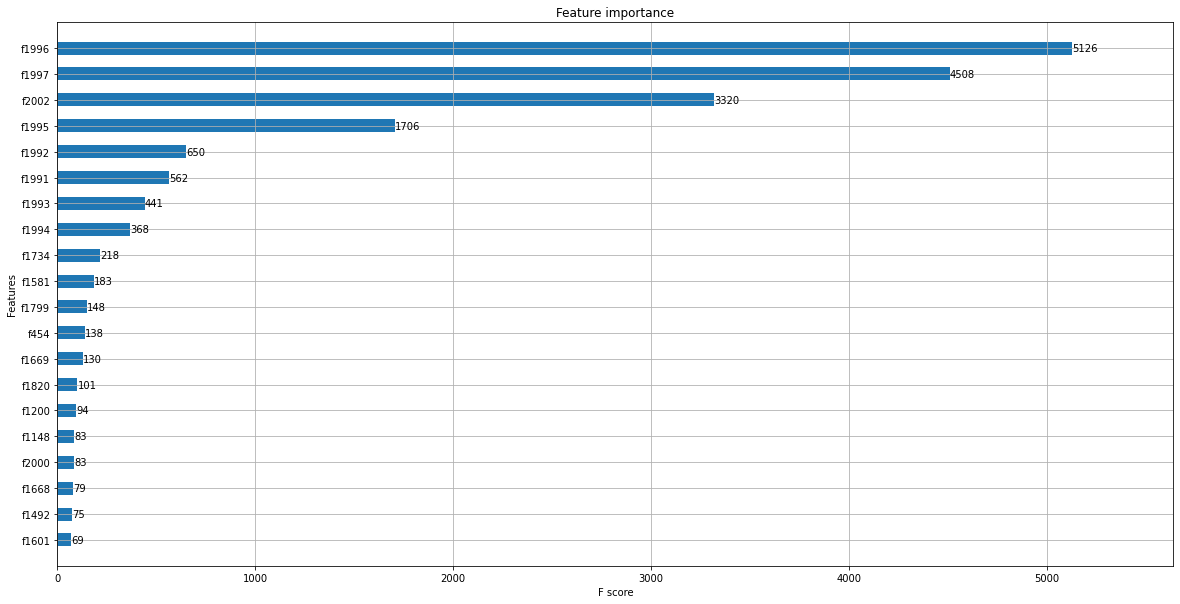

In [ ]:
import xgboost as xgb

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
xgb.plot_importance(xgbc, max_num_features=20, height=0.5, ax=ax)
# plt.rcParams['figure.figsize'] = [1000, 1000]
plt.show()